# Spaceship Titanic - Detailed EDA and NaN-Imputation
<br>


<img src="Pictures/Titanic.png" width="700"/>


&emsp; &emsp; &emsp; &emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; Spaceship Titanic from [Doctor Who, Story 189](https://tardismusings.blogspot.com/2018/01/story-189-voyage-of-damned.html)


<br> 
<br> 
<br> 
The following notebook provides my personal approach to statistically analyze the dataset provided in the [Spaceship Titanic Kaggle challenge](https://www.kaggle.com/competitions/spaceship-titanic), which is the main aim of this notebook. 

As part of the analysis, we will not only **take a look at the provided features** alone, but we will also **discover relationships amongst variables**, **engineer new features** and **investigate different strategies to fill missing values** in the dataset. I will describe very detailed what I am analyzing, which insights the different plots provide, why I choose certain values for missing data imputation, etc.

The goal of the whole process is to gain a deep understanding of the different features before starting to engineer models to predict the target variable "Transported" and of course to clean the dataset.

The modeling process to predict the target variable "Transported" is not the main goal of this notebook. But in the end of it, in section 5, I will also cover two example baseline **ensemble models**, one **RandomForest** and one **GradientBoostingClassifier**. 
<br> 


The notebook is structured as follows:
1. [**Import Dependencies and load Data**](#Section1)



2. [**General Overview**](#Section2)


3. [**Bivariate and Multivariate Analysis**](#Section2.1)


4. [**Preprocess Data and impute missing Values**](#Section3)


5. [**Train exemplary Baseline-Models**](#Section5)
<br>


<br>
<a id="Section1"></a>

&emsp; &emsp; &emsp; &emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; Spaceship Titanic from [Doctor Who, Story 189](https://tardismusings.blogspot.com/2018/01/story-189-voyage-of-damned.html)

# 1. Import Dependencies and load Data

### 1.1 Import dependencies

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn import tree

from SupportFunctions import annotate_bar_perc

### 1.2 Load the data

In [12]:
train = pd.read_csv("./spaceship-titanic/train.csv")
test = pd.read_csv("./spaceship-titanic/test.csv")

<a id="Section2"></a>

## 2. General Overview 

In this part of the analysis we will take a look at: 
- the features, 
- their univariate distributions in relation to the target variable, 
- NaN-values
- possible obvious correlations.

### 2.1 Description of the dataset and genreal overview

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

1. **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
3. **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. **Destination** - The planet the passenger will be debarking to.
6. **Age** - The age of the passenger.
7. **VIP** - Whether the passenger has paid for special VIP service during the voyage.
9. **RoomService** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
3. **FoodCourt** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities. 
3. **ShoppingMall** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities. 
3. **Spa** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
3. **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
10. **Name** - The first and last names of the passenger.
11. **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
---
**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set. Same columns as train.csv.


In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
# We can see that CryoSleep and VIP contain boolean values but are saved as objects
# We need to transform them for later analysis
train[["CryoSleep", "VIP"]] = train[["CryoSleep", "VIP"]].astype("boolean")

In [6]:
# Show description of all numeric features
train.describe(include=float).applymap(lambda x: f"{x:0.2f}") # Round to 2 decimals

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,1611.49,604.70,1136.71,1145.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


In [7]:
# Show all categorical and boolean features
train.describe(include=[object, bool])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


**Target variable**

We can see in the following plot, that the dataset is balanced with respect to the target variable "Transported".

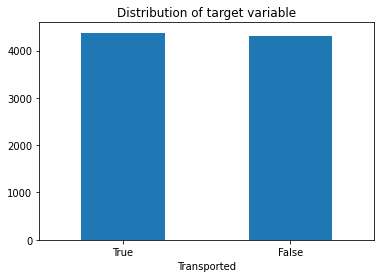

In [8]:
train.Transported.value_counts().plot(kind="bar", title="Distribution of target variable", xlabel="Transported", rot=0)
plt.show()

**Colourcoded Pairplots of numeric data**

We will now take a look at the numeric columns as a whole with pairplots, while colourcoding datapoints by their respective Transportation-status. As we can see from the plot below, the columns referring to the expenses on deck are strongly skewed to the right. So there are a lot of 0/low expenses and some very high outliers. Since these datacolumns represents strictly positive amounts, we can log-transform them to get a better overview of possible differences in the distribution of expenses of "Transported" and "Non-Transported" guests.

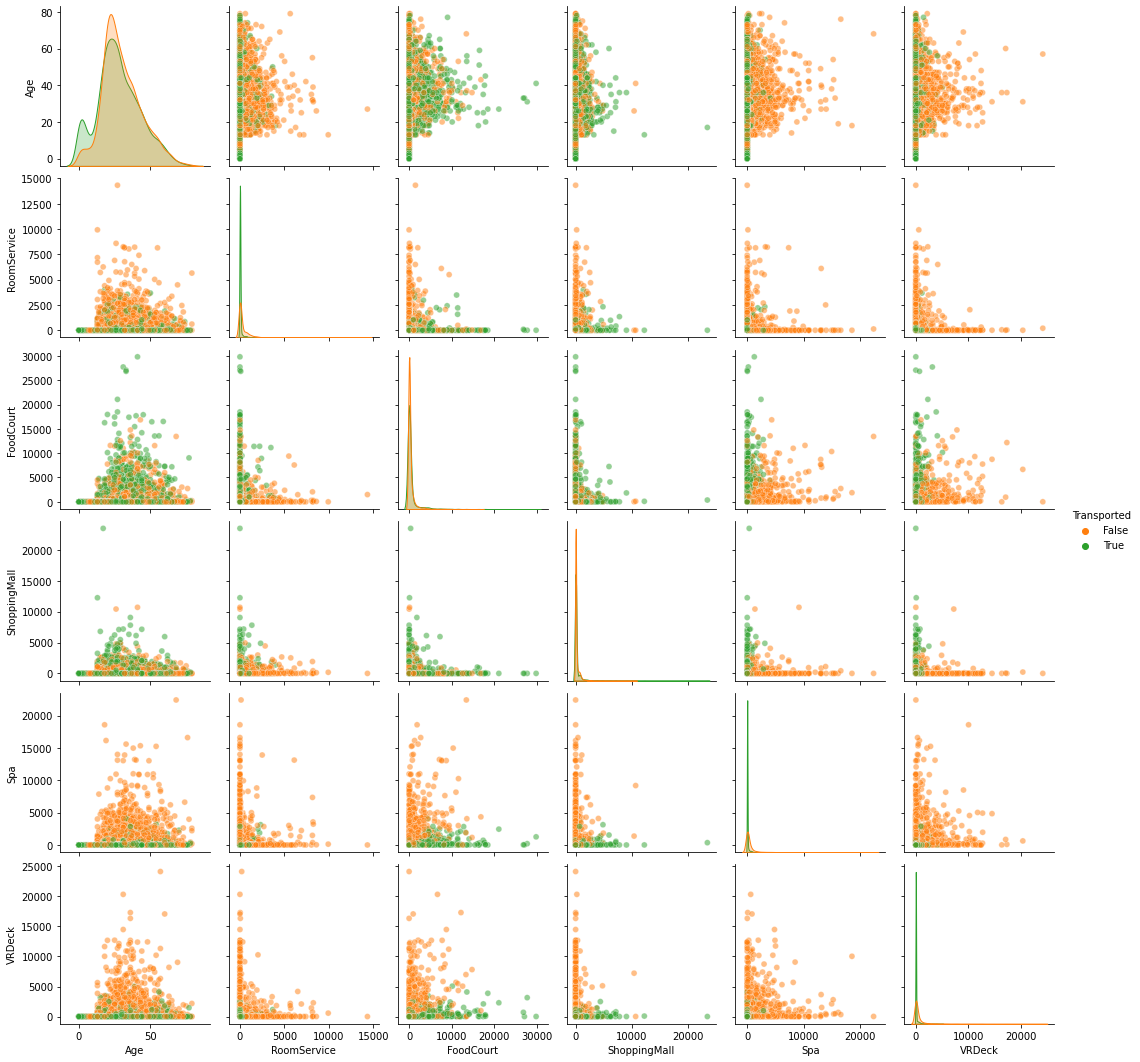

In [9]:
sns.pairplot(train.drop(["CryoSleep", "VIP"],axis=1), hue="Transported", palette=["C1", "C2"], 
             kind="scatter",
             diag_kind="kde",
             plot_kws={'alpha': 0.5})
plt.show()

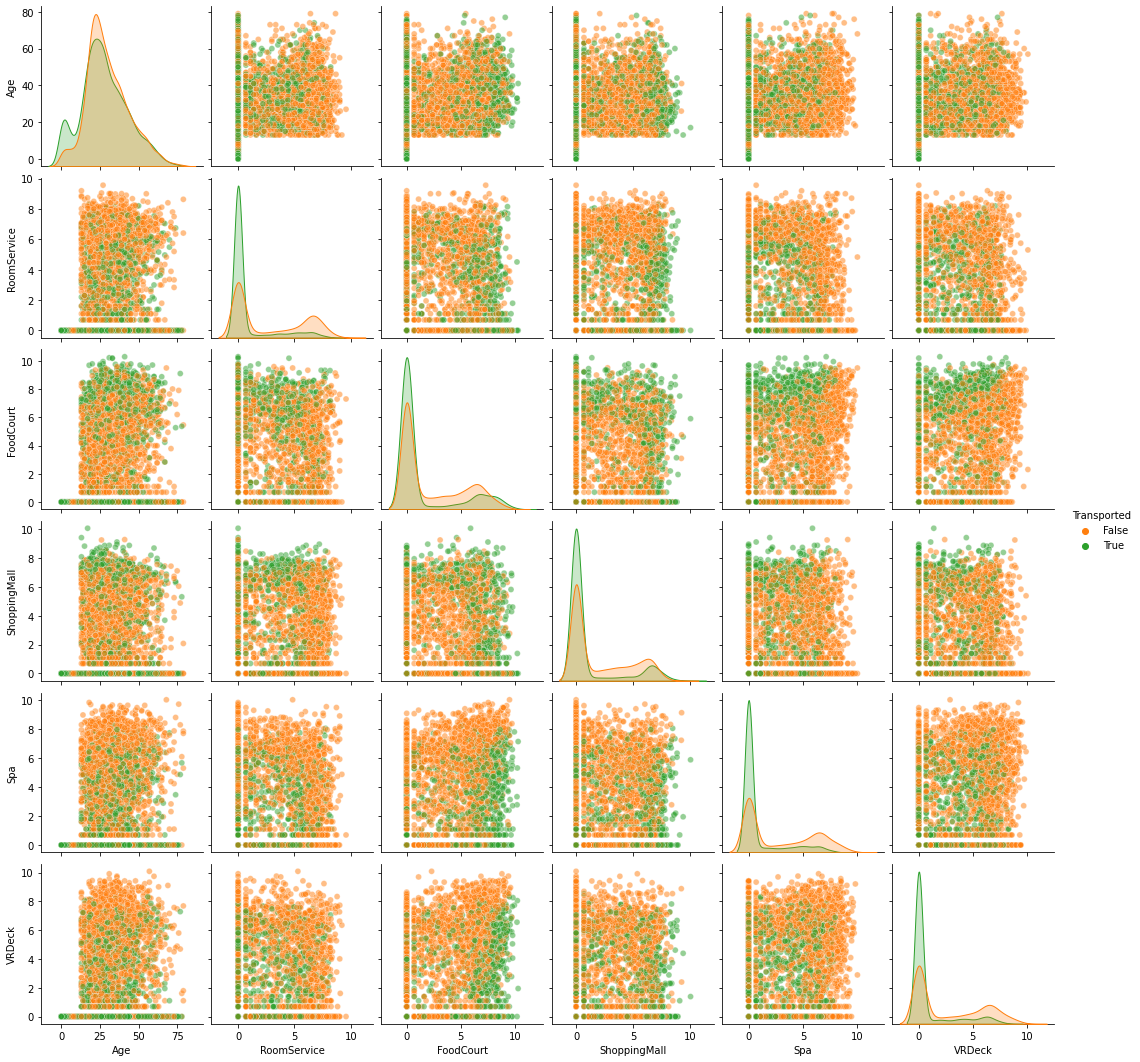

In [10]:
# Log-transform data and plot pairplots
log_train = train.copy()
to_log_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

log_train[to_log_cols] = log_train[to_log_cols].apply(lambda col: np.log(col+1), raw=True, axis=1)

sns.pairplot(log_train.drop(["CryoSleep", "VIP"],axis=1), hue="Transported", palette=["C1", "C2"], 
             kind="scatter",
             diag_kind="kde",
             plot_kws={'alpha': 0.5})
plt.show()

From the first overview of the diagonal elements, we can conclude, that guests who were transported have a higher probability mass in their KDE-plots on lower expenses. Vice versa we can see, that guests that were not transported have more probability mass at higher expenses. So there could be a causal relationship between the target variable and the amount of money people spent on deck. Guests with higher budgets seem to be less likely to being transported. We should investigate this in more detail later in the analysis, also connecting it with the VIP-status. 

All other scatterplots are too messy to gain any insight from this small overview. In general it will be interesting to analyze, whether there are any relationships between the expense-categories (people using RoomService are eating less at the food court, ...) or whether there are no interesting relationships and it is enough to just look at total expenses as the sum of all the expenses on deck.

### 2.2 Univariate Visualizations

Here we will visualize each univariate distribution of the features dependent on the target variable.

Before we start, we add the column "TotalExp" as a sum of all expenses.

In [11]:
train["TotalExp"] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(1)


#### 2.2.1 Numerical features

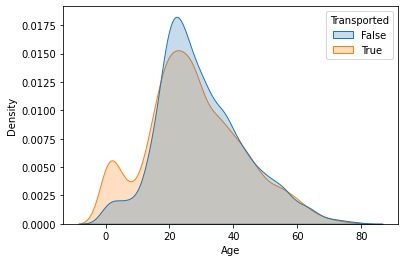

In [12]:
# Age plot
sns.kdeplot(data=train, x="Age", hue="Transported", shade=True)
plt.show()

The two age distributions look pretty similar, besides the peak at very young ages for transported passengers. This could indicate that children had a higher likelihood of being transported. 

For the expenses, we will first investigate the share that the individual expense categories make up and then take a look at the log-transformation of them, to get a nicer overview. 

In [13]:
all_exp = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum().sort_values(ascending=False)
all_exp.name = "Share of the individual expense categories"
np.round(all_exp/all_exp.sum(), decimals=2)

FoodCourt       0.31
Spa             0.21
VRDeck          0.21
RoomService     0.15
ShoppingMall    0.12
Name: Share of the individual expense categories, dtype: float64

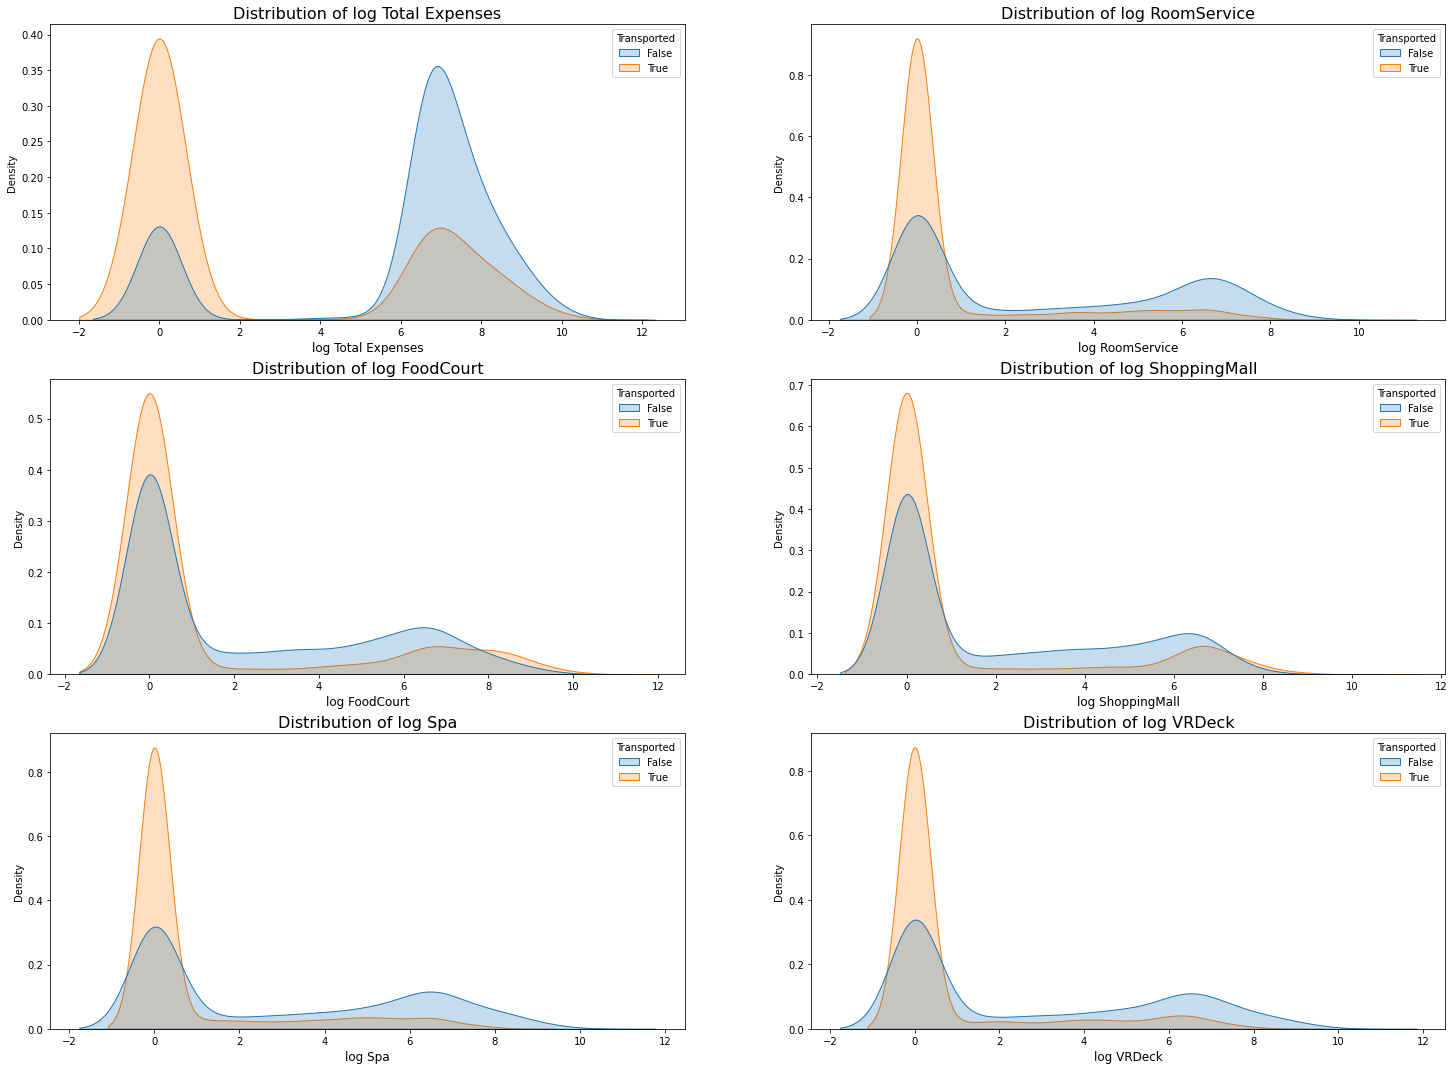

In [14]:
numeric_features = ['Total Expenses', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
log_train["Total Expenses"] = np.log(train.TotalExp+1)
plt.figure(figsize=(25,25))
for i, feat in enumerate(numeric_features):
    plt.subplot(4,2,i+1)
    sns.kdeplot(data=log_train, x=feat, hue="Transported", common_norm=False, shade=True)
    plt.xlabel("log "+feat, fontsize=12)
    plt.title("Distribution of log "+feat, fontsize=16)

We can see, that the category that has the highest percentage for the total expenses is the FoodCourt with around 31%. Spa and VRDeck are very close, ShoppingMall and RoomService have the lowest percentage. 

The plot for the total expenses is very insightful: Each distribution looks like two separate (almost) non-skewed normal distributions, with mean of ~0 (since we added one to all expenses to prevent log(0), the mean on the original scale would be 0) and ~7 (exp(7)-1 on the original scale so around 1095).  

For the passengers who were transported, a lot of probability mass is around 0. So it seems reasonable, that guests spending less on board, were more likely to be transported. On the other hand, a big part of passengers who were not transported, spent a lot more money on the cruise. 

Also, we can see that the distribution of expenses for transported vs. not transported passengers look more similar for the expense categories ShoppingMall and FoodCourt (high peak around 0, small peak for higher expenses) and look more different for the categories Spa, VRDeck and RoomService (which all seem to be more luxury categories). In the latter expense categories, for passenger s who were not transported, we can see a higher probability mass for higher expenses in these areas. This could indicate that more privileged passengers were less likely to being transported. 

The expense categories for food and shopping seem less important for predicting the target variable since both distributions for both categories look very similar. This makes sense: Privileged passengers did spend similar amounts for food and shopping (still with a tendency for high expenses) but additionally spent more for the luxury experiences. That is why these luxury expenses are more suitable for prediction of transported vs. not transported.


#### 2.2.2  Categorical features

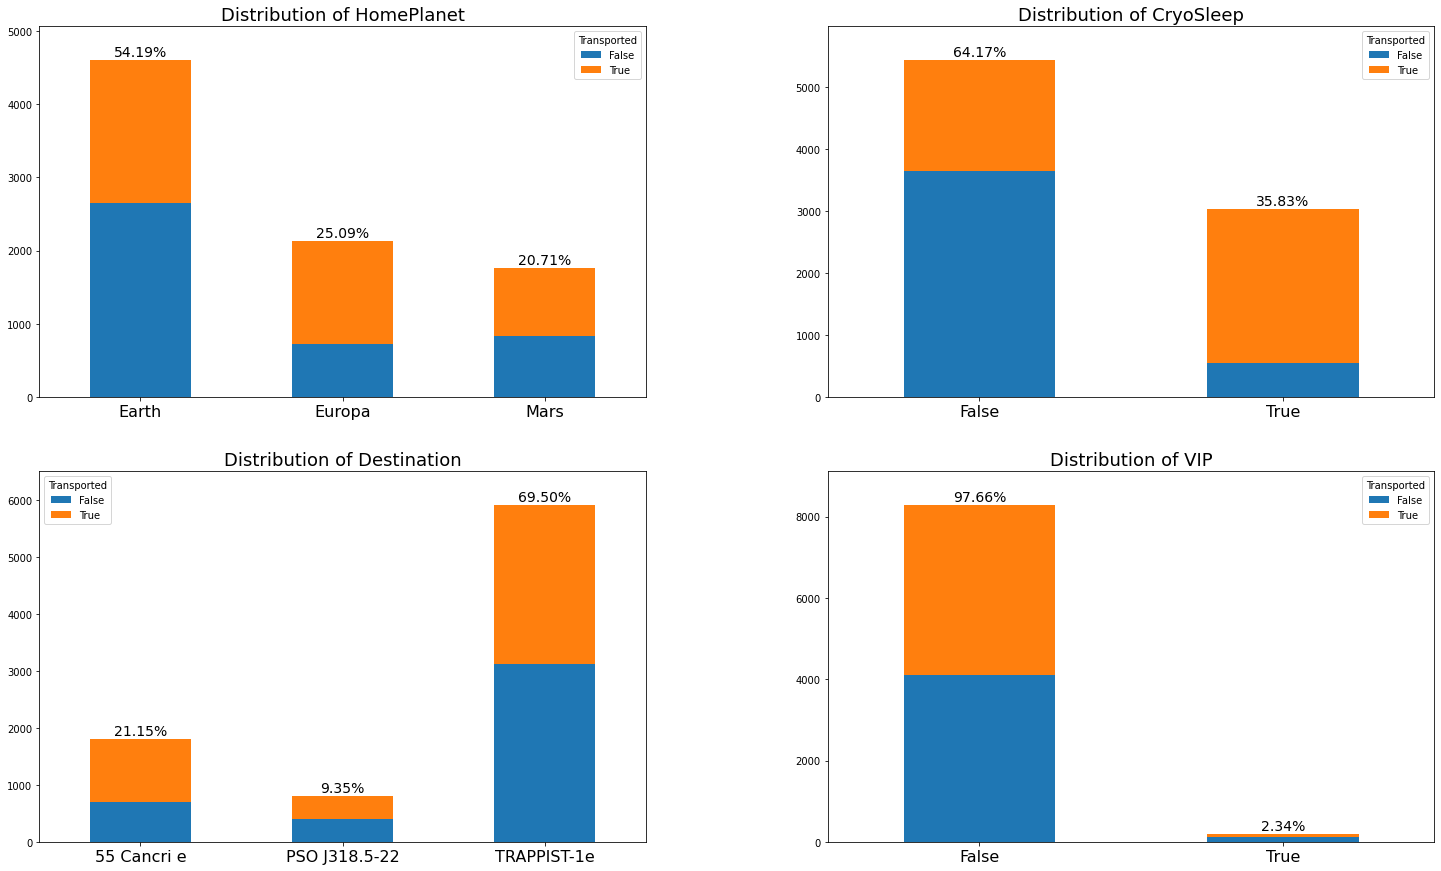

In [15]:
cat_feat = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
plt.figure(figsize=(25,15))

for i, feat in enumerate(cat_feat):
    plt.subplot(2,2,i+1)
    p1 = train.groupby(feat)["Transported"].value_counts().unstack().plot(kind="bar", stacked=True, rot=0, ax=plt.gca())
    
    nrows = train.dropna(subset=feat).shape[0]
    annotate_bar_perc(p1, nrows)
    
    y_upper = train[feat].value_counts().to_numpy().max()*1.1  # Get 110% of upper limit 
    plt.ylim((0, y_upper))
    plt.title("Distribution of "+feat, fontsize=18)
    plt.xlabel("")
    plt.xticks(fontsize=16)

plt.subplots_adjust(wspace=0.3)

For the HomePlanet, we can see that most of the passengers came from Earth and that guests from Europa were more likely to be transported. 

The CryoSleep variable shows an interesting relationship: A **very high percentage** of passengers who chose to be in CryoSleep during the cruise, were transported. 

Also, we can observe that the VIP status was very rare and only a small percentage of passengers were VIPs. 

### 2.3 Check for NaN-values

Now we will turn to the NaN-values. What we want to know in this part of the analysis is:

   1. How many NaN-values are there?
   2. Are there rows with a very high number of NaN-values, we should drop?
   3. How are they distributed? 
   4. Are there any obvious patterns? Is there a relationship/correlation between NaN-positions? (so if one column value is missing, another one is missing with a high probability too)

In [16]:
print(f"Number of rows:                       {len(train)}")
print(f"Number of rows with >= 1 NaN-value:   {(train.isna().any(1).sum())}")
print(f"\nPercentage of 'full'-rows:            {100-(train.isna().any(1).sum()/len(train))*100:.2f}%")

Number of rows:                       8693
Number of rows with >= 1 NaN-value:   2087

Percentage of 'full'-rows:            75.99%


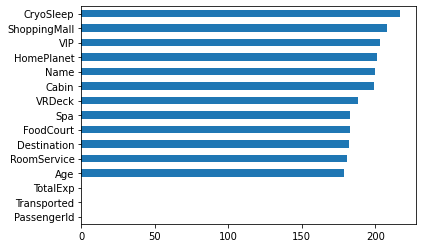

In [17]:
train.isna().sum().sort_values().plot(kind="barh")
plt.show()

All columns show more or less equal amounts of NaN values (~2%) - besides Target variable and PassengerID which are 100% filled with data. 

Now let's take a look at the positions of NaN-values inside the columns:

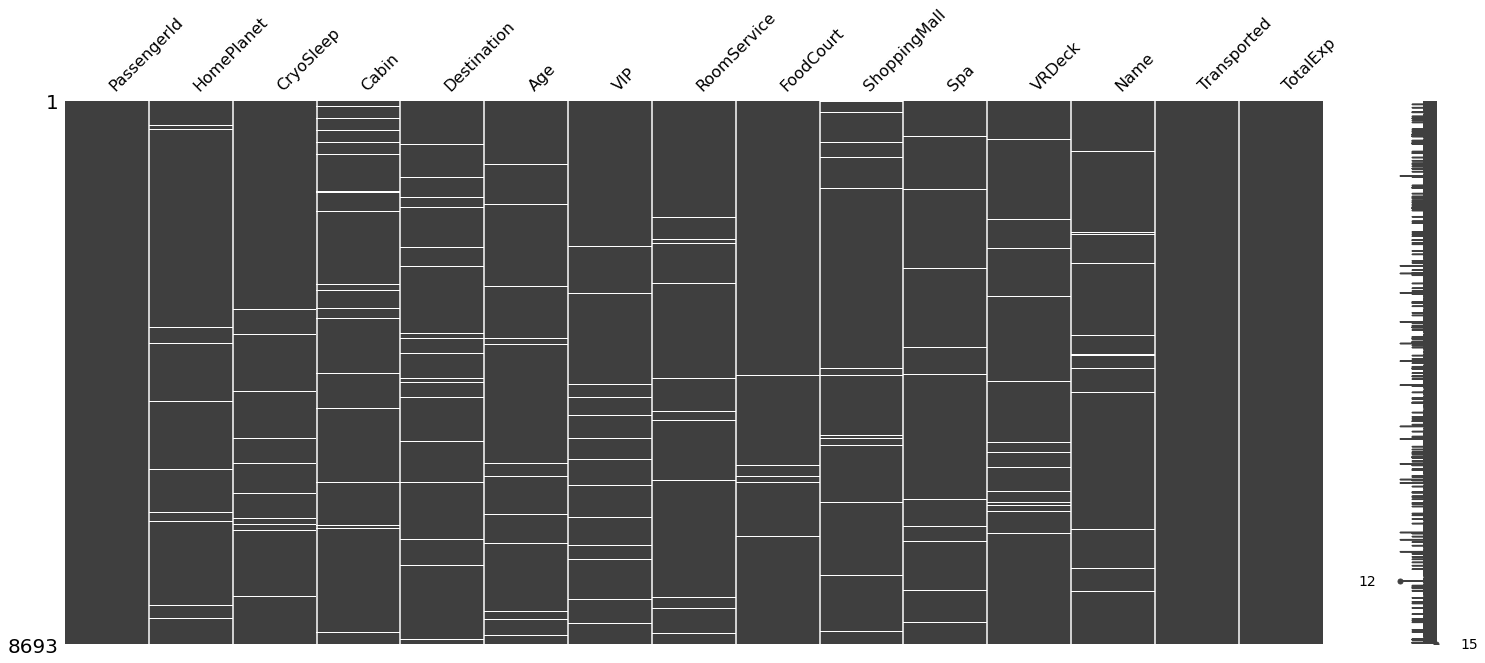

In [18]:
msno.matrix(train)
plt.show()

In [19]:
# Get relative occurence of number of NaNs in rows
(train.isna().sum(1)).value_counts(normalize=True)[1:]

1    0.214771
2    0.023352
3    0.001956
dtype: float64

We can see that there is a minimum of 11 non-NaN-values always present out of the 14 features so in one row a maximum of three values are missing, which is only rarely the case. 
- Most of the rows have all data, (\~76%)
- many are missing one value (\~21.5%), 
- some are missing two values (\~0.23%), 
- very few are missing three values (<0.02%).

Now we will take a look at possible correlations among NaN-values. To get a better overview, we summarize all expenses on deck to one new column "TotalExpenses". Also, we drop all rows which do not have any NaN-values, since they will increase the equality of two compared columns (since 76% of the rows will have the same value, 1, indicating an existing value). This process will lead to higher, easier to see correlations as when diluting with a high number of similar values. 

Here are the interpretations of the (extreme) correlations for NaN-values:
- -1: If NaN in this column, definitely not NaN in other column
-  0: Absence of value has no correlation woth absence in other column
-  1: If NaN in one column then definitely NaN in other column too 

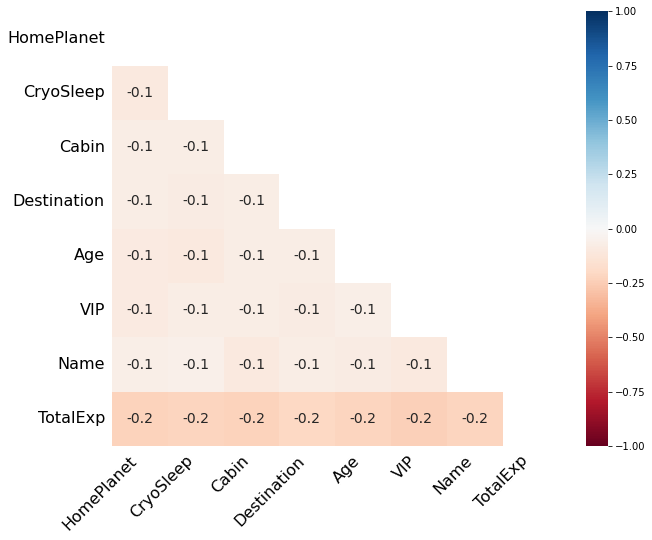

In [20]:
# Now look at NaNs in TotalExpenses instead of every one on their own (higher chance of seeing correlation):
nan_corr = train.drop(["PassengerId", "Transported"], axis=1)
nan_corr["TotalExp"] = train.iloc[:, [7,8,9,10,11]].sum(axis=1, skipna=False)

# Drop the single expense categories
nan_corr = nan_corr.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)

plt.figure(figsize=(10,8))
msno.heatmap(nan_corr[nan_corr.isna().any(1)], ax=plt.gca())
plt.show()

**Findings of NaN-Analysis:**
- PassengerId and Transported (target variable) have no missing values
- in general rows all have >= 11 values so <= 3 missing values in total, for the most part, so deletion of rows does not make any sense
- there is no correlation between the occurrence of missing values in different columns, all correlations are <0.25 (so no pattern was found regarding the distribution of missing values)

### 2.4 First overview over possible correlations

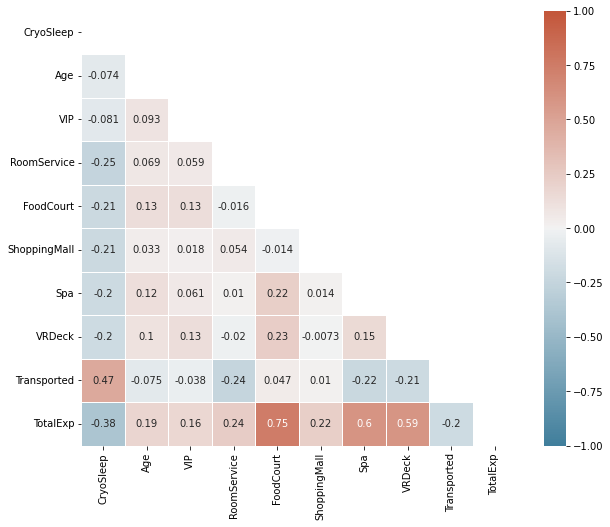

In [21]:
plt.figure(figsize=(10,8))

mask = np.triu(np.ones_like(train.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap, mask=mask, square=True, linewidths=.5)
plt.show()

From this correlation plot, we can already extract some information/theories, that we can investigate during the detailed analysis of the features. The following relationships seem interesting:

- CryoSleep and Transported have the highest (positive) correlation found in the dataset, indicating that passengers that were in a state of CryoSleep were likely to get transported and vice versa
- CryoSleep and all of the expense categories seem to be slightly negative correlated, suggesting that passengers in CryoSleep did spend less (which makes sense since they were sleeping the entire time)
- RoomService, Spa and the VRDeck are slightly negatively correlated with the target variable, so we should investigate whether passengers using spending more in these areas were more likely of not being transported (Maybe since they were more privileged? So had nicer cabins in other part of the ship?) 

Note: Interesting is that the VIP status is not correlated to the target variable - even though we would think that VIPs also spend a lot for RoomService/Spa/VRDeck. We should investigate this in more detail. 
<br>
<br>

<a id="Section2.1"></a>

## 3. Bivariate and Multivariate Analysis

In this part of the analysis we will dive deeper into feature-relationships to further investigate the already acquired theories and explore new ones. Also, some new features are extracted from e.g. from the PassenegrID. We will exclude the name and cabin in the first part and will take a look at them in the end (for possible further features and relationships). 

### 3.1 Feature Engineering - PassengerID 
> A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

In [22]:
print(f"The train dataset contains {len(train)} records of passengers.")

The train dataset contains 8693 records of passengers.


In [23]:
train.PassengerId.value_counts().max()
# Every PassengerID is unique

1

In [24]:
train.PassengerId.head(5)

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object

**Decide on preprocessing of variable**

We transform the column containing the PassengerId on string-format into three new columns:
1. GroupID (int)   - Unique ID of the group the passenger is in
2. GroupPos (int) - Position in the group, that is assigned to passenger
3. GroupSize (int) - New feature, that assigns each passenger the size of the group he is part of

In [13]:
def preprocess_PassengerId(data):
    """
    Preprocess PassengerID. Returns three columns:
        1. GroupID   - Unique ID of the group the passenger is in
        2. GroupPos  - Position in the group, that is assigned to passenger
        3. GroupSize - New feature, that assigns each passenger the size of the group he is part of
    """
    
    new_ID = data.PassengerId.str.split("_", expand=True)
    new_ID.columns = ["GroupID", "GroupPos"]
    new_ID.GroupPos = new_ID.GroupPos.str.replace("0","").astype(int)
    
    # Get dictionary of ID to GroupSize (extract max GroupPos from positions in unique ID)
    group_size_dict = new_ID.groupby("GroupID").max().to_dict()["GroupPos"]
    
    # Assign group size to each row from dict
    new_ID["GroupSize"] = new_ID.apply(lambda row: group_size_dict[row["GroupID"]], axis=1)
    
    # Delete preceeding 0s from GroupID
    new_ID.GroupID = new_ID.GroupID.str.replace(pat=r"\b0+(?=\d)", repl="", regex=True).astype(int)
    
    return new_ID

# Add new features
train_old = train.copy()
train = pd.concat([train_old, preprocess_PassengerId(train_old)], axis=1)
train.head().iloc[:,-3:]

,GroupID,GroupPos,GroupSize
0,1,1,1
1,2,1,1
2,3,1,2
3,3,2,2
4,4,1,1


**Analyze amount/size of groups and position in the group**

In [26]:
# Count the number of groups for each size
group_size_counts = train.groupby("GroupID")["GroupSize"].max().value_counts().reset_index()
group_size_counts.columns = ["GroupSize", "Counts"]


print(f"Total number of groups: {group_size_counts.Counts.sum()}\n")
print(f"Perc. travelling alone: {(train.GroupSize==1).mean()*100:.2f}%\n")
print(f"Overview of group size and respective count:\n")
print(group_size_counts)

Total number of groups: 6217

Perc. travelling alone: 55.27%

Overview of group size and respective count:

   GroupSize  Counts
0          1    4805
1          2     841
2          3     340
3          4     103
4          5      53
5          7      33
6          6      29
7          8      13


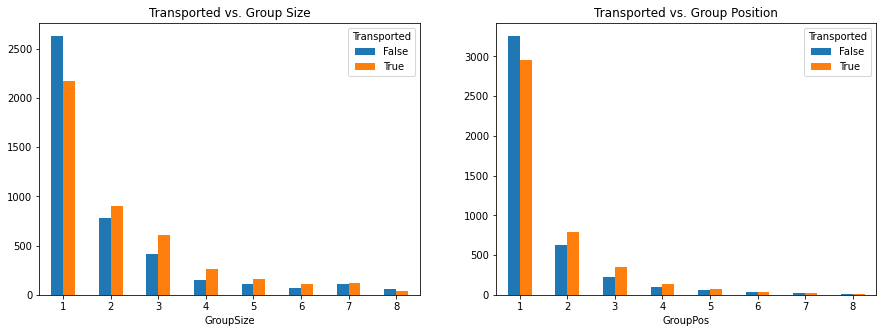

In [27]:
# Plot who was transported depending on the group size and position in the group
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) 

# Plot GroupSize vs. Transported
train.groupby("GroupSize")["Transported"].value_counts().unstack().plot(kind="bar", rot=0, title="Transported vs. Group Size", ax=plt.gca())

plt.subplot(1,2,2)

# Plot GroupPos vs. Transported
train.groupby("GroupPos")["Transported"].value_counts().unstack().plot(kind="bar", rot=0, title="Transported vs. Group Position", ax=plt.gca())
plt.show()

We can see, that people traveling alone (over 55% of all passengers) are a little more likely to not being transported. Vice versa, passengers who are on the ship together with a group (most of them probably as families) are slightly more likely to get transported. 

From the second plot it is also obvious, that the passenger position in the group has no real influence on the transportation. It shows a similar relationship to the target variable as the GroupSize. But it could be interesting to look at the age too, to see whether the age of the transported person is important (so are children more likely to be transported?).

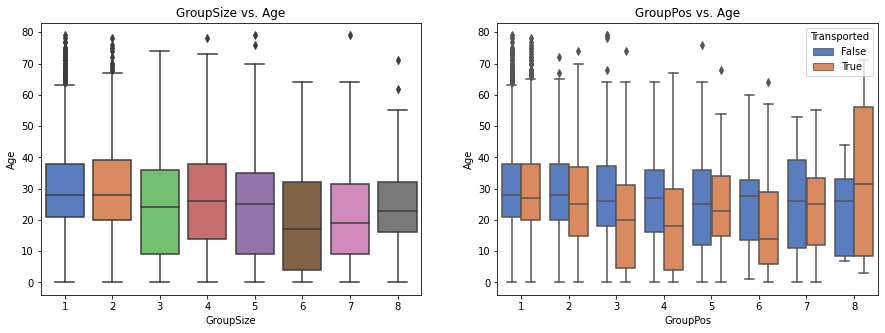

In [28]:
# Plot Age vs. GroupSize/Pos  
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) 
plt.title("GroupSize vs. Age")
sns.boxplot(data=train, x="GroupSize", y="Age", ax=plt.gca(), palette="muted")
plt.subplot(1,2,2)
plt.title("GroupPos vs. Age")
sns.boxplot(data=train, x="GroupPos", y="Age", hue="Transported", ax=plt.gca(), palette="muted")
plt.show()

We can clearly see, that for people traveling alone or in a group of two (most likely with their partner/friend in a similar age group), the likelihood of being transported is very similar among the different ages. Also, it gets apparent that groups of 1/2 are formed by a tighter age group (75% around 20-40), than bigger groups who also include more younger passengers. 

An interesting conclusion can be drawn especially about groups of 3/4 passengers: In these groups younger passengers were more likely to being transported in comparison to older ones. 

**Funny note:** Every passenger group size has babies, so guests declared to be 0 ages old. There are even infants traveling alone!



As we have seen, especially the Group_size seems so have (some) influence on the Transported-variable. But we have to keep in mind, that both new columns, GroupPos and GroupSize, have a high correlation (0.75). So it could make sense to only include one of them in the final model (so to drop GroupPos).

**Do people in the same Group get transported/not transported together?**
<br>
To answer this question, we will take a look at all the Groups with at least two members and then count the values for transported/not transported in this group:

In [29]:
# Get count of True/False for Transported for each GroupID
groupID_transported = train[train.GroupSize>1].groupby("GroupID")["Transported"].value_counts().unstack(fill_value=0)

# Get number of rows of this new DF, where one of the labels (True/False) is zero 
# (so all of them were either transported or not)
same_fate = (groupID_transported==0).any(1).sum()

print(f"Percentage of group members in groups>1 sharing same fate: {same_fate/len(groupID_transported)*100:.2f}%")

Percentage of group members in groups>1 sharing same fate: 43.56%


This is an important insight! In over 43% of all Groups with at least two members, **all members of the group shared the same fate!**, so were either transported or not. One possible reason for this observation could be, that they (e.g. as a family) were likely to be a the same place on the ship, when the incident happened. 

**Do people in the same Group come from the same planet?**
<br>
To answer this question, we will take a look at all the Groups with at least two members and then count the number of unique values for their HomePlanet within the groups:

In [30]:
home_planet_groups = train[train.GroupSize>1].groupby("GroupID")["HomePlanet"].unique().apply(lambda x: len(x))
same_planet = home_planet_groups.value_counts(normalize=True).iloc[0]

print(f"In {same_planet*100:.2f}% of all groups, each group member comes from the same HomePlanet.")

In 93.70% of all groups, each group member comes from the same HomePlanet.


This fact is also very insightful and we can use it to impute missing HomePlanet values.

**Do people in the same Group have the same destination?**

In [31]:
home_planet_groups = train[train.GroupSize>1].groupby("GroupID")["Destination"].unique().apply(lambda x: len(x))
home_planet_groups.value_counts(normalize=True)

2    0.496459
1    0.453966
3    0.046742
4    0.002833
Name: Destination, dtype: float64

Here we can see a slightly different picture, around 50% of the groups show two different Destinations and 45% have the same one. So a good strategy for imputing could be to count the occurence of HomePlanets in each group, if there is only one, take it. Otherwise take the one with the highest count. In case of two or more planets with the same count, randomly sample one of them. 

In [32]:
# Cretae mask that gets rows for passengers in groups > 1 where at least one is VIP
mask_group_vip = train.groupby("GroupID")["VIP"].transform(lambda x: (len(x)>1)&(x.sum()>=1))

# Count number of VIPs in each group
train[mask_group_vip].groupby("GroupID")["VIP"].sum().value_counts()

1    101
2      5
Name: VIP, dtype: Int64

From the result we can clearly see, that in all the groups that have at least one VIP, in almost all of them there is only one VIP. So regarding imputation, we can just fill all NaNs with False. This is overall the most likely value and even if there is a VIP already in the group, we prooved that this does not mean that the other members of the group alsp have VIP status. 

### 3.2 CryoSleep vs. Expenses

Now we will look at what passengers spent in CryoSleep vs. Not in CryoSleep, because it would make sense that the ones in CryoSleep did spend less money than others, since they were sleeping the entire time.

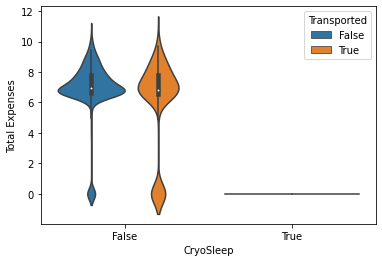

In [33]:
sns.violinplot(data=log_train.dropna(subset="CryoSleep"), x="CryoSleep", y="Total Expenses", hue="Transported")
plt.show()

In [34]:
# Proof that the sum of all expenses from passengers in CryoSleep equals 0
train[train["CryoSleep"]==True]["TotalExp"].sum()

0.0

We can see from the plot, that passengers in CryoSleep seem to not spend anything on deck. The line of code above proofs this assumption, that indeed the sum of all expenses from passengers in CryoSleep is 0. As stated above, this totally makes sense when considering that they are in a state of suspended animation in which they most likely
do not have any desire for food (and of course they cannot leave their cabin for shopping etc.)

This is a very important fact, from two perspectives:
   1. We know now, that people in CryoSleep do not spend any money. This not only explains the high number of zero expenses we saw in the plots before (since **more than 35%** of passengers are in CryoSleep) but also helps us to get more insight into expense patterns by eliminating those passengers who are not able to buy anything anyways (e.g. now we can see whether there are still passengers buying nothing, ...).
   2. It may **help us to impute** some values (if CryoSleep -> Expenses = 0, if Expenses = 0 -> (most likely) CryoSleep), much better compared to imputing missing Expenses with mean even though passenger was sleeping!
   
Let's take a look at the NaN-value imputation strategies, we can derive from the observed relationship:

#### NaN-Imputation for CryoSleep and Expenses

We can already identify two imputation-strategies, that can be applied without any doubt and without adding additional bias to the data (but rather adding valuable information):
   1. CryoSleep = True, TotalExp = NaN:
       - Imputation: TotalExp = 0 (Safety: 100%)
       
       
       
   2. CryoSleep = NaN, TotalExp > 0:
       - Imputation: CryoSleep = False (Safety: 100%)  
       
For the other cases, we need to analyze the data first, to find appropriate imputations. We will start with the following case:

3. CryoSleep = NaN, TotalExp = 0: Here, it may seem obvious to simply impute with True, since we learned that people in CryoSleep do not spend anything on board. But this is true for one direction, but we do not yet know, whether there are maybe a lot of other passengers who are not in CryoSleep but still don't spend any money. That is what we will investigate now.

But first, let's check whether this detailed analysis is even worth it, so how many NaNs we could resolve with a good strategy:


In [35]:
# First we need to make sure, that in the TotalExp column, it correctly reflects if one expense category is NaN
cryo_expenses = train[['CryoSleep', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].copy()
cryo_expenses["TotalExpNan"] = cryo_expenses[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(1, skipna=False)

# Boolean mask for >= 1 NaN (either CryoSleep and/or TotalExpNan)
mask_nan_geq_1 = cryo_expenses.isna().any(1)
cryo_expenses_nan = cryo_expenses[mask_nan_geq_1]
print(f"Rows with >= 1 NaN (CryoSleep and/or TotalExp):  {mask_nan_geq_1.sum()}")

Rows with >= 1 NaN (CryoSleep and/or TotalExp):  1101


**Note:** This number underlines the fact, that this very detailed analysis of the different cases could proof as extremely valuable for the performance of trained models! In the beginning we observed, that from the 8693 rows in the training set, 2087 contained at least one NaN-value. The different cases we investigate here, regarding the NaN-values of CryoSleep and all expense categories, **account for over 50% of all those NaN-containing rows**. So if we find good/safe strategies for all cases, we boost the cleanliness and thus the degree of information of the dataset immensely!

Okay, let's try to find the most probable value for CryoSleep, when the total expenses are 0:

In [36]:
# Get number of all cases where TotalExp=0
print(f"All cases with TotalExp=0:                    {cryo_expenses[(cryo_expenses.TotalExpNan==0)].dropna(subset=['CryoSleep']).shape[0]}\n")
print(f"All cases with CryoSleep=True & TotalExp=0:   {cryo_expenses[cryo_expenses.CryoSleep&(cryo_expenses.TotalExpNan==0)].shape[0]}")
print(f"All cases with CryoSleep=False & TotalExp=0:  {cryo_expenses[~cryo_expenses.CryoSleep&(cryo_expenses.TotalExpNan==0)].shape[0]}")

All cases with TotalExp=0:                    3160

All cases with CryoSleep=True & TotalExp=0:   2690
All cases with CryoSleep=False & TotalExp=0:  470


So just from the probability, the more probable imputation for case 3 should be CryoSleep=True. But we will still take a look at the 470 cases where nothing is spent even though the passengers are awake. Especially the age distribution is interesting:

In [37]:
# Add the Age column to 
cryo_expenses["Age"] = train.Age.copy()

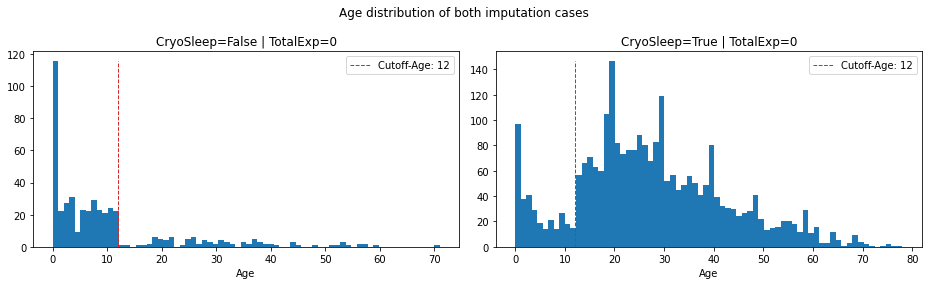

In [38]:
plt.figure(figsize=(13, 4))
plt.subplot(1,2,1)
bins1, ages1, _ = plt.hist(cryo_expenses[~cryo_expenses.CryoSleep & (cryo_expenses.TotalExpNan==0)].Age, bins=70)
plt.axvline(12, ymax=0.95, color="C3", ls="--", lw=1, label="Cutoff-Age: 12")
plt.legend()
plt.title("CryoSleep=False | TotalExp=0")
plt.xlabel("Age")
plt.subplot(1,2,2)
bins2, ages2, _ = plt.hist(cryo_expenses[cryo_expenses.CryoSleep & (cryo_expenses.TotalExpNan==0)].Age, bins=70)
plt.axvline(12, ymax=0.95, color="C3", ls="--", lw=1, label="Cutoff-Age: 12")
plt.legend()
plt.title("CryoSleep=True | TotalExp=0")
plt.xlabel("Age")
plt.suptitle("Age distribution of both imputation cases")
plt.tight_layout()
plt.show()

In [39]:
# Following dataframe can be used to find the cutoff
# pd.DataFrame({"BinHeight":bins1, "Age":ages1[1:]} ).head(30)

In [40]:
# Get Cutoff-quantiles
q1 = (cryo_expenses[~cryo_expenses.CryoSleep & (cryo_expenses.TotalExpNan==0)].Age <= 12).mean() 
q2 = (cryo_expenses[cryo_expenses.CryoSleep & (cryo_expenses.TotalExpNan==0)].Age > 12).mean()

print(f"CryoSleep=False | TotalExp=0:  {q1*100:.2f}% of passengers <= 12")
print(f"CryoSleep=True  | TotalExp=0:  {q2*100:.2f}% of passengers  > 12")

CryoSleep=False | TotalExp=0:  78.51% of passengers <= 12
CryoSleep=True  | TotalExp=0:  84.94% of passengers  > 12


From both plots, it becomes obvious, that our theory was proven right. If we look at all cases where the total expenses are zero and compare the age distribution for passengers in CryoSleep and not in CryoSleep, we can see that the latter shows a very narrow distribution with a strong tendency to lower ages. Over 78% of passengers who are not in CryoSleep and who are still spending nothing on deck, are <= 12 years old. So our theory, that young children do not have their own money but get paid by their parents instead, seems to be true. 

The second plot for people in CryoSleep shows a broader distribution and has a tendency towards higher ages. More than 84% of the passengers in this group are older than 12. It resembles a little bit a normal distribution centered around ~23. 

Both plots show a cut at around the same age: For the first one, observation probabilities drop significantly whereas for the second they immediately rise. That is why 12 seems to be a good cut off age to distinguish between both distributions. 

In summary we found, that instead of assuming that every person with 0 expenses is in CryoSleep, we can do an even better job for imputing missing CryoSleep values when simultaneously looking at the age of the passenger: If the passenger is younger than 13, we assume that he or she is not in CryoSleep. For older passengers, we showed that it is more likely for them to be in CryoSleep, so we would impute True in this case. Of course this method will produce some errors but should be sufficient for a high quality imputation.

<br>
Now, just as an experiment, we look at the decision boundary that a DecisionTree with only one split trained on the Age feature would suggest (based on minimizing the weighted entropy to increase degree of impurity of the two leaf-nodes):

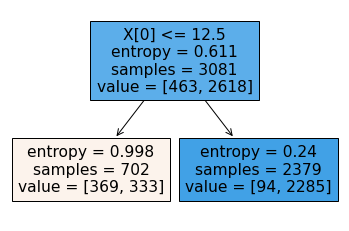

In [41]:
decTree = tree.DecisionTreeClassifier(max_depth=1, criterion="entropy")
age_cryo_zero_exp = cryo_expenses[cryo_expenses.TotalExpNan==0].dropna(subset=["Age", "CryoSleep"])[["Age", "CryoSleep"]]
decTree = decTree.fit(X=age_cryo_zero_exp.Age.to_numpy().reshape(-1, 1), y=age_cryo_zero_exp.CryoSleep.map(lambda x: 1 if x else 0))

tree.plot_tree(decTree, filled=True)
plt.show()

4. CryoSleep = False, TotalExp = NaN: This case is not as easily resolvable as the rest of the cases were. As of now, we do not have enough information to find a satisfying imputation strategy. 

But as we will discover in later parts of the analysis, the following process can be used:
- Passengers <= 12 will **never** spend any money so here we can safely assume expenses of 0
- We will see that besides the passengers in CryoSleep, who do not spend any money on the cruise and the kids <= 12, there is still a not negligible amount of people not spending anything (most obvious explanation: other group/family members pay for them). So if all other expense categories are 0, it is likely that the NaN-category is 0 too
- Expenses are closely connected to the group you are traveling with, so when group size > 1, we can take the mean/median of the expense category that is missing  for the group and use this value for imputation
- In all other cases, so for passengers traveling alone, we will discover, that expenses are also connected to the deck that the passengers cabin is located at. So for these cases it makes sense to use the deck median as a rough approximation (not the mean since it is more sensitive to outliers, which are present especially for the expenses)

In [42]:
case_4 = cryo_expenses[(~cryo_expenses.CryoSleep&(cryo_expenses.TotalExpNan.isna()))]

# How many cases are there?
print(f"Case 4 makes up for {cryo_expenses[(~cryo_expenses.CryoSleep&(cryo_expenses.TotalExpNan.isna()))].shape[0]} NaN-cases in total.")

Case 4 makes up for 537 NaN-cases in total.


<br>

### 3.3 Feature Engineering - Cabin
> The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

<br> 

**Decide on preprocessing of variable**

We transform the column containing the Cabin in string-format into three new columns:
1. Deck (str)    - Letter referring to the Deck the cabin is located on 
2. Number (str)  - Cabin Number
3. Side (str)    - Side of the ship, either P for Port or S for Starboard

In [14]:
def preprocess_Cabin(data):
    """
    Preprocess Cabin. Returns three columns:
        1. Deck    - Letter referring to the Deck the cabin is located on 
        2. Number  - Cabin Number
        3. Side    - Side of the ship, either P for Port or S for Starboard
    """
    
    new_cols = data.Cabin.str.split("/", expand=True)
    new_cols.columns = ["Deck", "CabinNum", "Side"]
    return new_cols

train_old = train.copy()
train = pd.concat([train_old, preprocess_Cabin(train_old)], axis=1).drop("Cabin", axis=1)

**Analysis of the new features and their relationships**

Let's first get a general overview over the Deck and the Side feature:

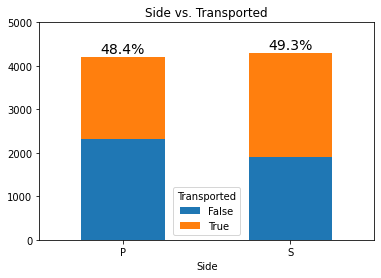

In [44]:
p1 = train.groupby("Side")["Transported"].value_counts().unstack().plot(kind="bar", stacked=True, rot=0)
annotate_bar_perc(p1, train.shape[0], prec=1)
plt.ylim((0, 5000))
plt.title("Side vs. Transported")
plt.show()

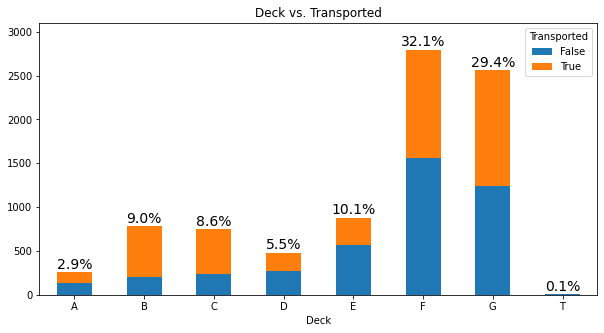

In [45]:
plt.figure(figsize=(10,5))

p1 = train.groupby("Deck")["Transported"].value_counts().unstack().plot(kind="bar", rot=0, title="Deck vs. Transported", ax=plt.gca(), stacked=True)
annotate_bar_perc(p1, train.shape[0], prec=1)
plt.ylim((0,3100))
plt.show()

The cabins deck seems so have an influence on the target variable as for example a higher ratio of passengers on deck B/C were transported whereas the ratio for transported passengers on deck D/E is smaller. The two biggest deck-categories F/G, which both make up over 60% of all passengers, show are more even distribution between transported and not-transported passengers. Category T accounts for only 0.1% of all cases (only 5 data points), which is why it could make sense to drop these samples (maybe just noise).

Moreover we can see, that the Side of the ship where the passenger cabin is located has no influence on the target variable. This is not only the case for the target variable, but for all other variables too. For example, here we can see the Age-distribution depending on the Side of the cabin:

Text(0.5, 1.0, 'Age distribution depending on Cabin-side')

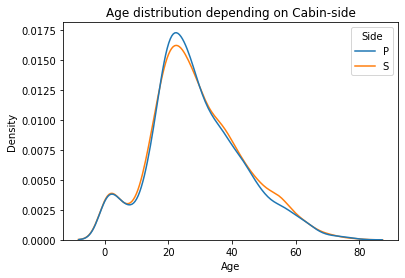

In [46]:
sns.kdeplot(data=train, x="Age", hue="Side")
plt.title("Age distribution depending on Cabin-side")

Both KDE-plots look almost identical. As described, this relation holds true for all other variables, which is why we did not include further plots for further features. 

In the following, we will focus on the Deck the guests cabin is located at, which shows some more interesting relationships. Let's first take a look at the share of different values of the categorical variables HomePlanet, Destination, CryoSleep and VIP-status inside each of the deck categories. Category T is excluded, since it only makes up 0.1% of all cabins.

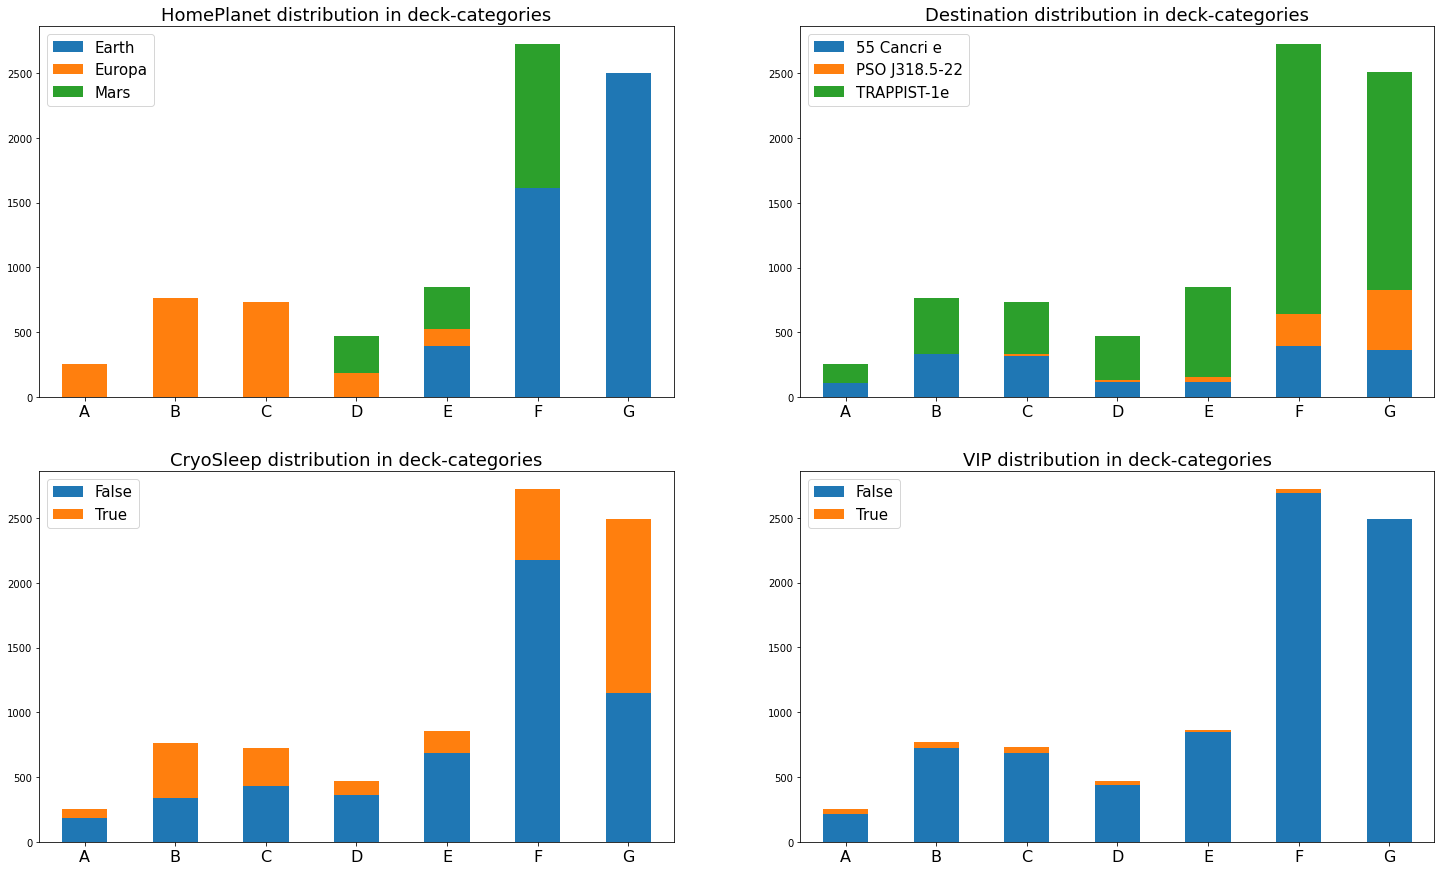

In [47]:
plt.figure(figsize=(25,15))
feats = ["HomePlanet", "Destination", "CryoSleep", "VIP"]

for i, feat in enumerate(feats):
    plt.subplot(2,2,i+1)
    plt.title(feat+" distribution in deck-categories", fontsize=18)
    train.groupby("Deck")[feat] \
         .value_counts() \
         .unstack() \
         .fillna(0) \
         .drop("T") \
         .plot(kind="bar", stacked=True, rot=0, ax=plt.gca())
    plt.legend(prop={'size': 15})
    plt.xticks(fontsize=16)
    plt.xlabel("")

**HomePlanet**
<br>
For the HomePlanet we get some nice information from the plot: Passengers on deck A, B and C are exclusively from planet Europa. Decks D, E and F are more mixed between the three HomePlanets. Deck G is also purely inhabited by passengers from one planet, Earth. 

These information can be used to impute almost half of the NaN-cases in the HomePlanet column safely. For the remaining NaNs, we will have to choose a different strategy later (e.g. Nearest Neighbor/Decision Tree/sampling with weights according to the shares from the plot above/...)

In [48]:
print(f"All HomePlanet NaNs        : {train.HomePlanet.isna().sum()}")
print(f'Safely resolvable (A/B/C/G): {train[train.HomePlanet.isna() & (train.Deck.isin(["A", "B", "C", "G"]))].shape[0]}')

All HomePlanet NaNs        : 201
Safely resolvable (A/B/C/G): 91


In [49]:
# Get decision tree that finds the same relationships/imputation strategies as described above
X = train.copy()
X = X.dropna()
y = X.HomePlanet
X = pd.get_dummies(X[['CryoSleep', 'Destination', 'Age', 'VIP', 
                      'RoomService', 'FoodCourt', 'ShoppingMall', 
                      'Spa', 'VRDeck', 'Transported', 'GroupID', 
                      'GroupPos', 'GroupSize', 'Deck', 'Side']], drop_first=True)

dt = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=100).fit(X, y)

# Plot the tree
# plt.figure(figsize=(20,20))
# tree.plot_tree(dt, feature_names=dt.feature_names_in_, class_names=dt.classes_, filled=True)
# plt.show()

**Destination**
<br>
For the destination, in contrast to the HomePlanet, we do not gain a lot of further information. We can for example see that passengers from A/B, are all starting from planet Europa and either travel to TRAPPIST-1e or 55 Cancri e. But in general, it looks quite random with only some smaller differences in the share of each respective destination in the deck groups.

**CryoSleep**
<br>
Regarding CryoSleep, we can see that especially in group B and G, a high share of passengers are sleeping (~50% compared to ~35% in the overall dataset). 

**VIP**
<br>
In case of the VIP-status, we can extract one useful observation for our imputation strategies: The small share of people with VIP status looks pretty similar across all decks. Only on deck G (which accounts for almost 30% of all passengers), there are no VIPs at all. So if VIP is missing and the passenger is on deck G (66 cases), we can safely impute False.

In [50]:
print(f"All VIP NaNs              : {train.VIP.isna().sum()}")
print(f'Safely resolvable (deck G): {train[train.VIP.isna()&(train.Deck=="G")].shape[0]}')

All VIP NaNs              : 203
Safely resolvable (deck G): 66


**Do people in the same Group share a cabin together?**

In [51]:
# Look how many unique values for the CabinNum can be found inside each group
group_cabin = train.groupby("GroupID")["CabinNum"].unique().apply(lambda x: len(x))
print(f"Percentage of passengers of one group, living in the same cabin: {(1-group_cabin[group_cabin>1].shape[0]/len(train))*100:.2f}%")

Percentage of passengers of one group, living in the same cabin: 94.17%


We can clearly see that in most cases, passengers in the same group are sharing the same cabin. Only in 5% of cases, they individual group members live in different cabins.

**Expense differences for different decks**

Now we will also take a look at possible differences regarding expenses for the different deck categories. Let's start by examining how many passengers did not spend anything on the cruise, even though they were not sleeping in CryoSleep. 

The first plot on the left shows the resulting percentages of passengers per deck when all Non-CryoSleep passengers with 0 expenses are included. The second plot to the right excludes kids under 18 with no expenses, since it seems to be a likely possibility that they are financed by their parents, who spend money for them during the cruise. 

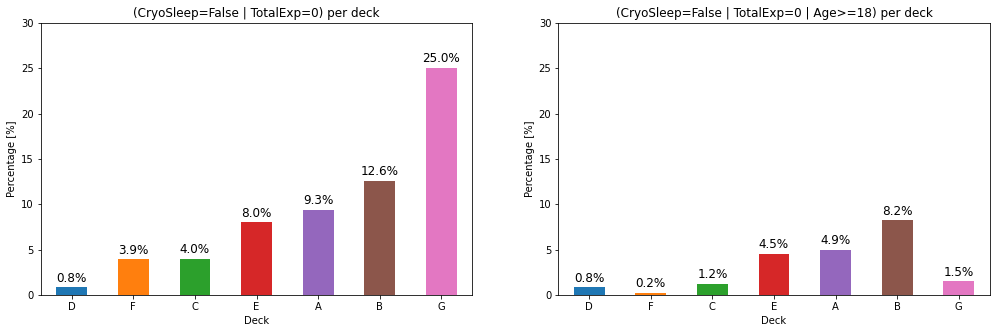

In [52]:
# Get number of Non-Cryo/Zero-Expenses
num_0 = train[~train.CryoSleep & (train.TotalExp==0)].groupby("Deck")["Transported"].count()

# Same but excluding all passengers < 18
num_0_over_18 = train[~train.CryoSleep & (train.TotalExp==0) & (train.Age>=18)].groupby("Deck")["Transported"].count()

# Get normalizing constant per deck
all_non_cryo = train[~train.CryoSleep].groupby("Deck")["Transported"].count().drop("T")

num_0_res = (num_0/all_non_cryo).sort_values()
num_0_res_over_18 = (num_0_over_18/all_non_cryo)[num_0_res.index]

plt.figure(figsize=(17,5))
for i, data in enumerate([num_0_res, num_0_res_over_18]):
    plt.subplot(1,2,i+1)
    # Get percentage labels for the bars 
    perc_labels = (data*100).round(decimals=1).to_list()
    perc_labels = [str(x)+"%" for x in perc_labels] # Add %-sign
    p1 = (data*100).plot(kind="bar",  rot=0, color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7'])
    plt.bar_label(p1.containers[0], labels=perc_labels, fontsize=12, padding=3)
    plt.ylim((0,30))
    plt.title(f"(CryoSleep=False | TotalExp=0{['',' | Age>=18'][i]}) per deck")
    plt.ylabel("Percentage [%]")
plt.show()

In [53]:
print(f"Total number of 0-expense-awake-cases: {num_0.sum()}")

Total number of 0-expense-awake-cases: 507


The share of passengers per deck we just looked at are passengers that are not in CryoSleep (and are older than 17), but still did not buy anything during the cruise, so not even food from the FoodCourt (507 cases in total). Especially the second biggest deck, deck G, shows a large percentage of 25%. 

When comparing the left and right plot, we get an important hint, that supports our hypothesis, that parents could pay for their kids, leaving the kids with 0 expenses. Almost all of the percentages dropped significantly. In group G we can even observe a decrease from 25% to 1.5%, which proves that nearly all of the 0-expense-cases from Non-Sleepers are minors under 18.

But since there are still some more remaining, we want to dig a little deeper into this topic, as those datapoints in general seem pretty odd, since it is hard to imagine not buying anything, especially food, on a (most-likely) multi-day trip. 

There are only two possible explanations, that one could think of: 
   1. They are traveling in a group (e.g. family as described above) and only one/some of them pay for everyone
   2. They could be crew members, that do not need to pay for anything
   
For option one, the difference between the left and right plot above already showed that a large proportion of the 0-expense-cases for awake passengers are accounted for by  young adults/children, who are most likely financed by their parents. We can take a look at specific examples:

In [54]:
train[train.GroupID==56]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExp,GroupID,GroupPos,GroupSize,Deck,CabinNum,Side
52,0056_01,Europa,False,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Okulas Tractive,True,0.0,56,1,3,A,1,S
53,0056_02,Europa,True,TRAPPIST-1e,38.0,False,0.0,0.0,0.0,0.0,0.0,Instab Tractive,True,0.0,56,2,3,A,1,S
54,0056_03,Europa,False,TRAPPIST-1e,27.0,False,279.0,605.0,3374.0,286.0,3.0,Zinoces Tractive,True,4547.0,56,3,3,A,1,S


In [55]:
train[train.GroupID==179]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExp,GroupID,GroupPos,GroupSize,Deck,CabinNum,Side
156,0179_01,Earth,False,TRAPPIST-1e,19.0,False,1.0,219.0,673.0,2.0,11.0,Elaney Webstephrey,True,906.0,179,1,3,G,26,P
157,0179_02,Earth,False,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Raque Webstephrey,False,0.0,179,2,3,G,26,P
158,0179_03,Earth,False,TRAPPIST-1e,3.0,False,0.0,0.0,0.0,0.0,0.0,Sallyl Webstephrey,True,0.0,179,3,3,G,26,P


We can see, that this could be a typical group of two parents, 38 and 27 years old, with a 2 year old child. And here, only one person in the group is actually spending money, most likely for the whole family. The same is true for the second example. What is also interesting, is that in these groups, all members have the same surname. Maybe this could also be extracted as some kind of feature later, but is at least another indicator for them being one family. 

We can further ask the question: **How many of these cases exist? Is this phenomenon common?**
To answer this question, we will look at all groups with at least two members, which account for around (100% - 55%) = 45% of all passengers, and will check how many of them follow the phenomenon. We will answer the following questions in the given order:

In [56]:
# Group all passengers in group > 1 by their unique group ID
groups_by_ID = train[train.GroupSize>1].groupby("GroupID")

print(f"Number of unique groups > 1: {len(groups_by_ID)}")

Number of unique groups > 1: 1412


*1. How many of these groups have at least one person with 0 expenses?*

> **Note:** This number can be strongly influenced by CryoSleep. If only one person in the group is in CryoSleep, they will automatically have 0 expenses. This is not uncommon since over 35% of all passengers are sleeping during the cruise.

In [57]:
print(f"{groups_by_ID.apply(lambda df: True if ((df.TotalExp==0).sum()>0) else False).mean()*100:.2f}% of all 1412 groups > 1.")

77.97% of all 1412 groups > 1.


*2. In how many of these groups do >= 50% of members spend nothing? (2 people: 1, 3 people: 2, 5 people: >=3, ...)*

> **Note:** This number can also be influenced by CryoSleep. 

In [58]:
print(f"{groups_by_ID.apply(lambda df: True if ((df.TotalExp>0).mean()>=0.5) else False).mean()*100:.2f}% of all 1412 groups > 1.")

63.67% of all 1412 groups > 1.


*3. In how many of these groups does only one person have expenses > 0?*

In [59]:
print(f"{groups_by_ID.apply(lambda df: True if ((df.TotalExp>0).sum()==1) else False).mean()*100:.2f}% of all 1412 groups > 1.")

44.76% of all 1412 groups > 1.


*4. For how many passengers does case 3, so all but one in group have TotalExp=0, account for?*

In [60]:
# Get GroupID of all groups where case 3 is true
case_3 = groups_by_ID.apply(lambda df: True if ((df.TotalExp>0).sum()==1) else False)
case_3_IDs = case_3.index[case_3]

print(f"Share of all group members together, from groups where case 3 is true, make up \
{train[train.GroupID.isin(case_3_IDs)].shape[0]/len(train)*100:.2f}% \
of all passengers.")

Share of all group members together, from groups where case 3 is true, make up 18.52% of all passengers.


We can see, that our thesis from above, that in some groups only one person is buying food, etc. for the whole family/group (all other have total expenses of zero), seems to be true. In over 44% of all the groups with at least two members, exactly one person has expenses > 0. The rest (as we have seen oftentimes young kids, or other relatives with the same surname) does not spend anything. 

Generally, we should keep that in mind when analyzing expenses. **Just because someone does not have any expenses, does not mean this passenger did not consume anything.** So they may have spent nothing for food/shopping/... because their relative bought/paid for these expenses for both of them. 

Also, this could be interesting to investigate during the modeling-process later on. One could check the effect on performance when we distribute the expenses of this one person evenly on all members in the group (so at least on the ones capable of consuming that are not in CryoSleep).

All in all, the described cases can be perfectly reasonable from the perspective of our first thesis. But there are still some examples of passengers with zero expenses and no CryoSleep **that are traveling alone.** So there is no possibility, that their expenses were covered by family/group members, which makes zero expenses very odd. 

Let's check how many of these cases exist over the whole dataset:

In [61]:
unplausible = train[~train.CryoSleep & (train.TotalExp==0) & (train.GroupSize==1)]
print(f"Num. rows with (Expenses=0|CryoSleep=False|Alone): {len(unplausible)}")

Num. rows with (Expenses=0|CryoSleep=False|Alone): 97


Either we need to assume, that these passengers are members of the crew, brought enough food for the entire trip, or we should exclude them from the dataset. But even if we keep them, we should at least delete those passengers from above, that are very young (e.g. <16). A young child going on a big cruise completely on their own, alone in a cabin, seems very unlikely. Also, we can assume that crew members are >= 18 years old. So for there is no 

In [62]:
too_young_alone = train[~train.CryoSleep & (train.TotalExp==0) & (train.GroupSize==1) & (train.Age<16)].shape[0]
print(f"Num. rows that should be removed (passengers too young to travel alone): {too_young_alone}")

Num. rows that should be removed (passengers too young to travel alone): 36


Summarizing, we can conclude that from all the 507 odd seeming datapoints for Non-CryoSleep passengers with 0 expenses, only 36 should probably be removed. The rest of them can be kept and have turned out to be within the realm of possibility considering the two presented hypotheses. 

Now, building on this knowledge, we can investigate all expenses for the different decks:

**Deck vs. Expenses**

In the following part, we will analyze the relationship between the deck and the different expense categories. To do this, we will filter out the passengers in CryoSleep, since they are not able to spend anything on the ship. This would only lead to a worse overview, since the plots will be shifted towards 0, distorting the information about passengers able to spend money on the cruise and their respective deck their cabin is located on.

We will start with a general overview over the total expenses by plotting a boxplot of the expenses of all Non-CryoSleep passengers depending on their deck together with a stripplot supporting the analysis. 

**Note:** For this plot, the boxplot whiskers boundaries are not set to 1.5xIQR as usual, but instead cover the whole interval over all observations in this class. This together with the stripplot gives a nicer overview, since outliers (so points outside Q1-1.5xIQR/Q3+1.5xIQR) are not marked differently. So here, the left whisker is located at the minimum and the right whisker at the maximum value. 

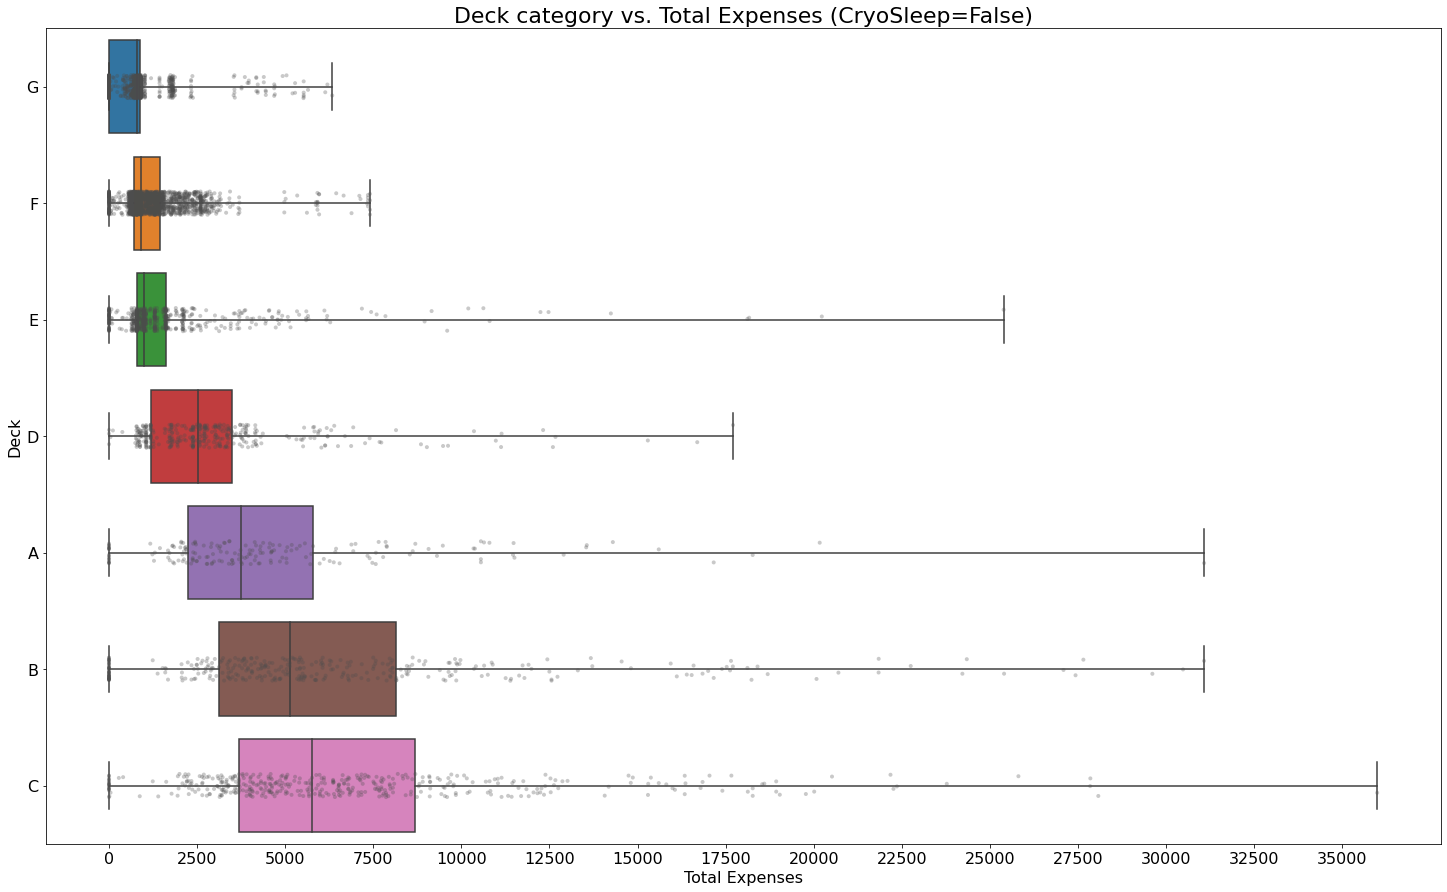

In [63]:
# Order boxplots ascending, regarding their median, and exclude deck T 
order_decks = train[~train.CryoSleep].groupby("Deck")["TotalExp"].median().sort_values().index.drop("T")

plt.figure(figsize=(25, 15))

# Horizontal boxplots of expenses of Non-CryoSleep passengers depending on deck category
sns.boxplot(data=train[~train.CryoSleep], y="Deck", x="TotalExp", whis=[0, 100], order=order_decks)

# Stripplot over the boxplots
sns.stripplot(data=train[~train.CryoSleep], y="Deck", x="TotalExp",
              size=4, color=".3", linewidth=0, order=order_decks, alpha=0.3)

plt.title("Deck category vs. Total Expenses (CryoSleep=False)", fontsize=22)
plt.yticks(fontsize=16)
plt.xticks(ticks=np.arange(0,37000,2500),fontsize=16, rotation=0)
plt.xlabel("Total Expenses", fontsize=16)
plt.ylabel("Deck", fontsize=16)
plt.show()

The plot sorted ascending by median reveals the difference in total expenses between the deck categories. We can see that the three biggest groups E, F and G, which in total account for over 70% of the passengers, show the lowest expenses overall. 

For deck G, there are still a lot of passengers buying nothing on the cruise and 75% of the data is smaller than ~1000 in total spending. The majority of the other samples are smaller than 2500 with a few outliers ranging until around 6000. Overall the big part of these datapoints fall in the very low segment of expenses, in a very narrow interval, compared to the other categories. 

Passengers on deck F and E look very similar, with a few higher outliers for E and of course the fact that deck E only accommodates 1/3 of the people living on deck F. Both categories show some 0 expenses and 75% of the values are < ~2000. Very high expenses in F rise until 7500 whereas a few outliers for E spend up to 25000. 

All in all, judging only by the overall observed purchase behavior and the high amount of passengers in these categories, all three decks resemble kind of an "Economy class". So a more or less lower budget class (maybe with smaller rooms and lower ticket fares), where F and E lean more towards an "Economy +" class. 

D looks like an intermediate class with a little higher expenses and a median around 2500.

Decks A, B and C look pretty similar, having the highest overall expenses and outliers (up to >35000), where A has the smallest and C the highest median with 3500 and 6000. For B and C, more than 50% of the passengers have spent more than 5000. These decks seem to be a higher class cabin group (also indicated by the lower amount of passengers on these decks), maybe with higher fares and bigger/more comfortable cabins. This is also supported by the fact, that the percentage of VIPs is higher for A/B/C in comparison to F or even G without any VIPs.

We can also see, that all categories show values at 0, so without any expenses. These are the cases we identified and analyzed in detail in the previous part of the analysis.

What is also interesting is that the plot is almost sorted by letters. 

In general we can say that deck A, B and C are probably the more expensive and luxurious cabins and F, G and E tend more towards lower fare cabins, with G as probably the most basic and cheap one. D seems to be somewhere inbetween.

We can dig a little deeper and look at the distribution of the expenses in each category per deck. The first plot on the top left shows the share of total expenses for each expense category and each deck. The other plots show the boxplots for each category but here the whiskers boundaries are set back to their usual value of 1.5xIQR.

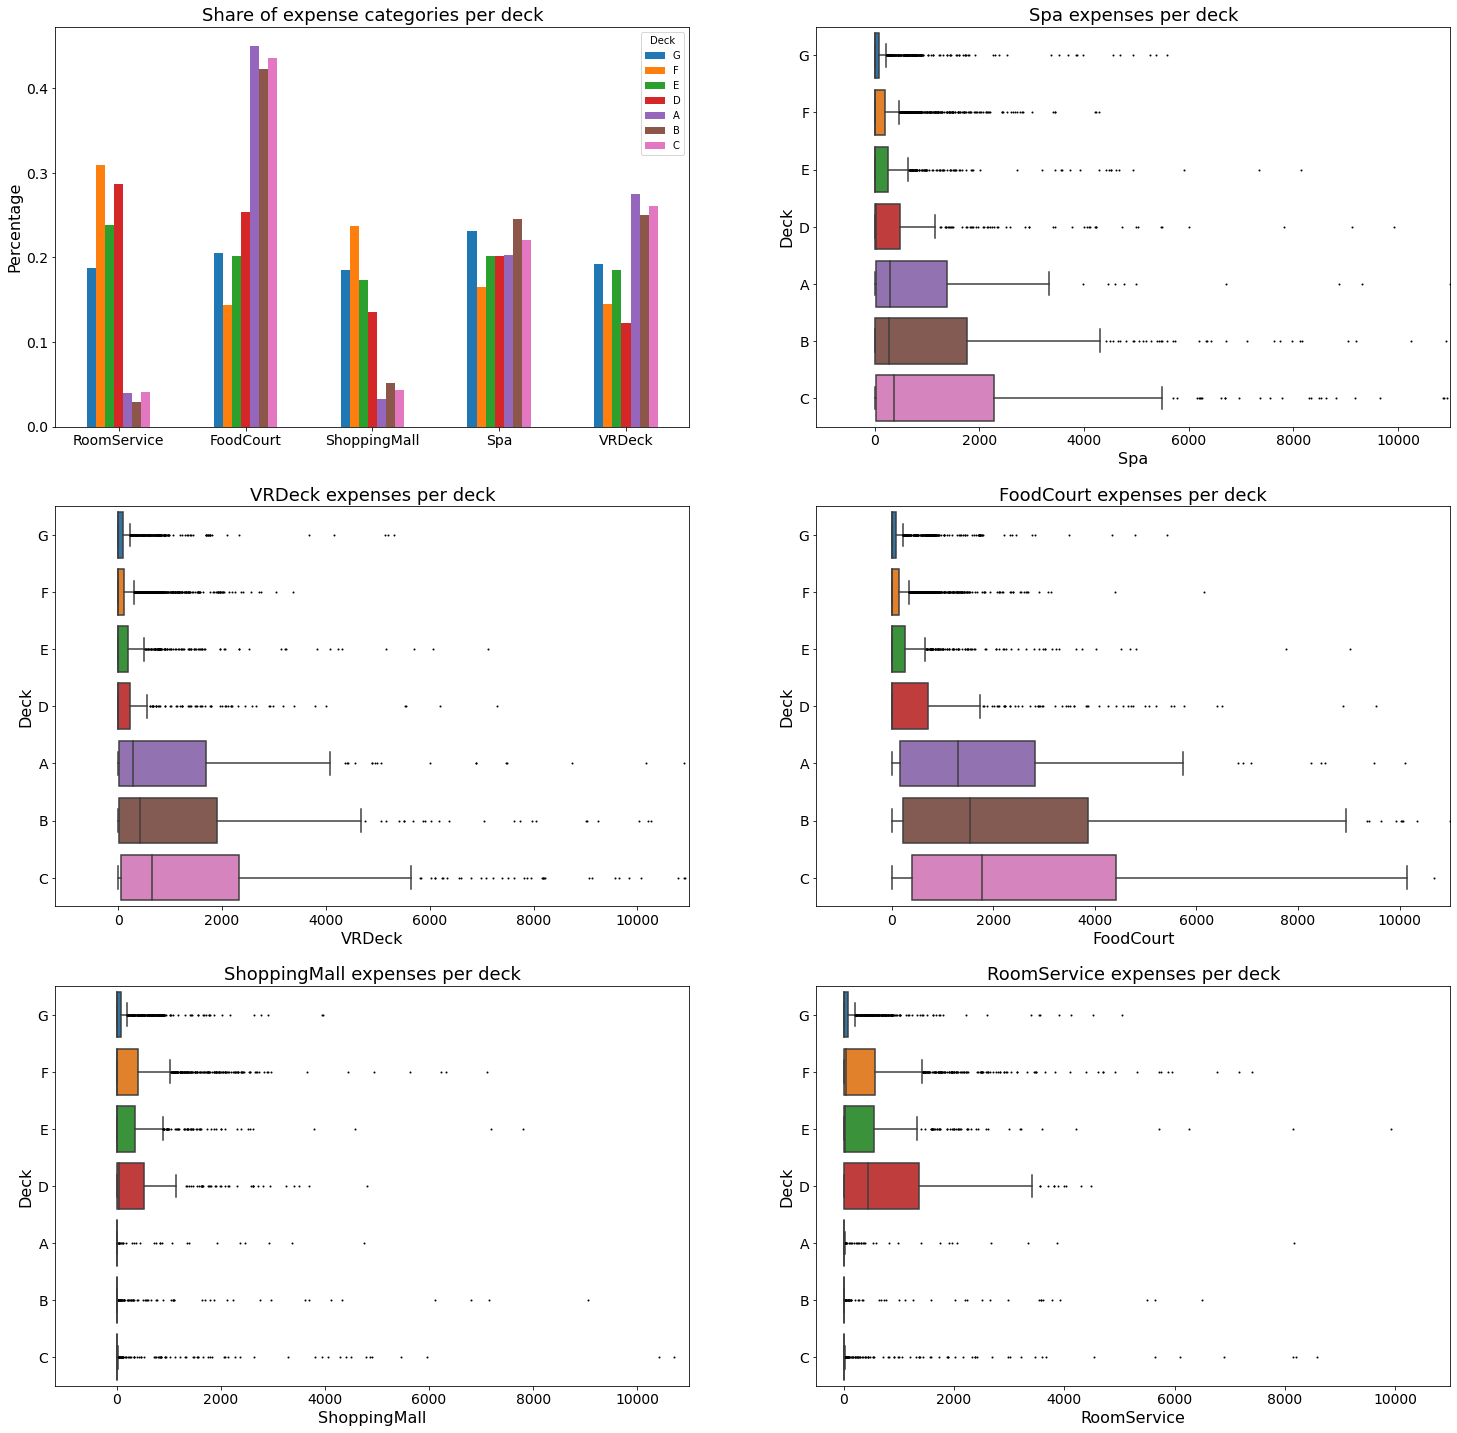

In [64]:
plt.figure(figsize=(25,25))
exp = ['Spa', 'VRDeck', 'FoodCourt', 'ShoppingMall', 'RoomService']

for i in range(6):
    if i == 0: # Plot share of expense category per deck
        plt.subplot(3,2,i+1)
        # Get sum of all expense categories per deck
        expense_totals_deck = train[~train.CryoSleep].groupby("Deck")[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalExp']].sum()
        
        # Transform into percentage share
        expense_totals_deck = expense_totals_deck.div(expense_totals_deck.TotalExp, axis=0).drop("TotalExp", axis=1).drop("T")
        expense_totals_deck.loc[order_decks.to_list(),:].transpose().plot(kind="bar", rot=0, ax=plt.gca())
        
        plt.title("Share of expense categories per deck", fontsize=18)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.ylabel("Percentage", fontsize=16)
        
    else: # Plot boxplots per deck for each expense category
        plt.subplot(3,2,i+1)
        
        # Same order as for the big plot
        sns.boxplot(data=train[~train.CryoSleep], y="Deck", x=exp[i-1], order=order_decks, 
                   flierprops = dict(marker='.', mfc="black", mec="None", markersize=4))
        plt.xlim(right=11000)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel(exp[i-1], fontsize=16)
        plt.ylabel("Deck", fontsize=16)
        plt.title(exp[i-1]+" expenses per deck", fontsize=18)

From the general share of total expenses, we can see the same tendency as we discovered before: Decks A, B and C have pretty similar characteristics as well as the rest, D, E, F and G, whose shares look close too. 

The latter decks show a more balanced distribution of the different expenses. With some individual differences among them, every one of the five categories accounts for more or less around 20% of total spendings (with a slight tendency towards RoomService). This can also be observed in the according boxplots.

Decks A, B and C on the other hand are not that evenly distributed, especially for RoomService, ShoppingMall and FoodCourt (for Spa and VRDeck, there is nor real difference compared to other decks). For all three, the FoodCourt-expenses make up over 40% of total spendings whereas RoomService and ShoppingMall fall behind with less than 5%. This is interesting, as we have identified these decks as the probably more luxurious decks, where you would expect higher spendings for RoomService for example. But passengers on these decks seem to be really into food, **a lot of food!**


**Summarizing we can say the following:**
<br>
In our analysis we discovered two groups of decks with pretty similar characteristics:

   1. **Deck A, B, C (~20%)   :** Passengers exclusively from Europa, spending on average more money on the cruise with a big appetite for food from the court, but without particular interest in shopping
   
   
   2. **Deck D, E, F, G (~80%):** Diverse passengers from different planets, spending in general less money but more balanced 
   
Other than that, we did not discover any particular interesting relationships between deck/side and other variables, which is why we did not include these plots here. For example the age distributions look very similar, also there is no big difference in group size distribution among decks, same is true for the side vs. Age and Groupsize. If you want to still take a look at them, the following code lines provide some of these examples you just have to uncomment and run to get the plot. 

In [65]:
# Age vs. Deck
# sns.kdeplot(data=train[train.Deck!="T"], x="Age", hue="Deck", common_norm=False) 

In [66]:
# GroupSize vs. Deck
# train.groupby("Deck")["GroupSize"].value_counts().unstack().fillna(0).plot(kind="bar", stacked=True)

In [67]:
# CabinNum vs. Side
# sns.kdeplot(x=train.dropna(subset=["CabinNum", "HomePlanet"]).CabinNum.astype(int), hue=train.dropna(subset=["CabinNum", "HomePlanet"]).Transported, common_norm=False)

In [68]:
# CryoSleep vs. Side
# train.groupby("Side")["CryoSleep"].value_counts().unstack().fillna(0).plot(kind="bar", stacked=True)

### 3.4 Further multivariate analysis

In the following grid, I added some more plots with information about relationships between variables (especially with regard to Age). As the informative value of these representations is comparatively low, especially against the background of the details already analyzed, I will only briefly comment on a few of them. 

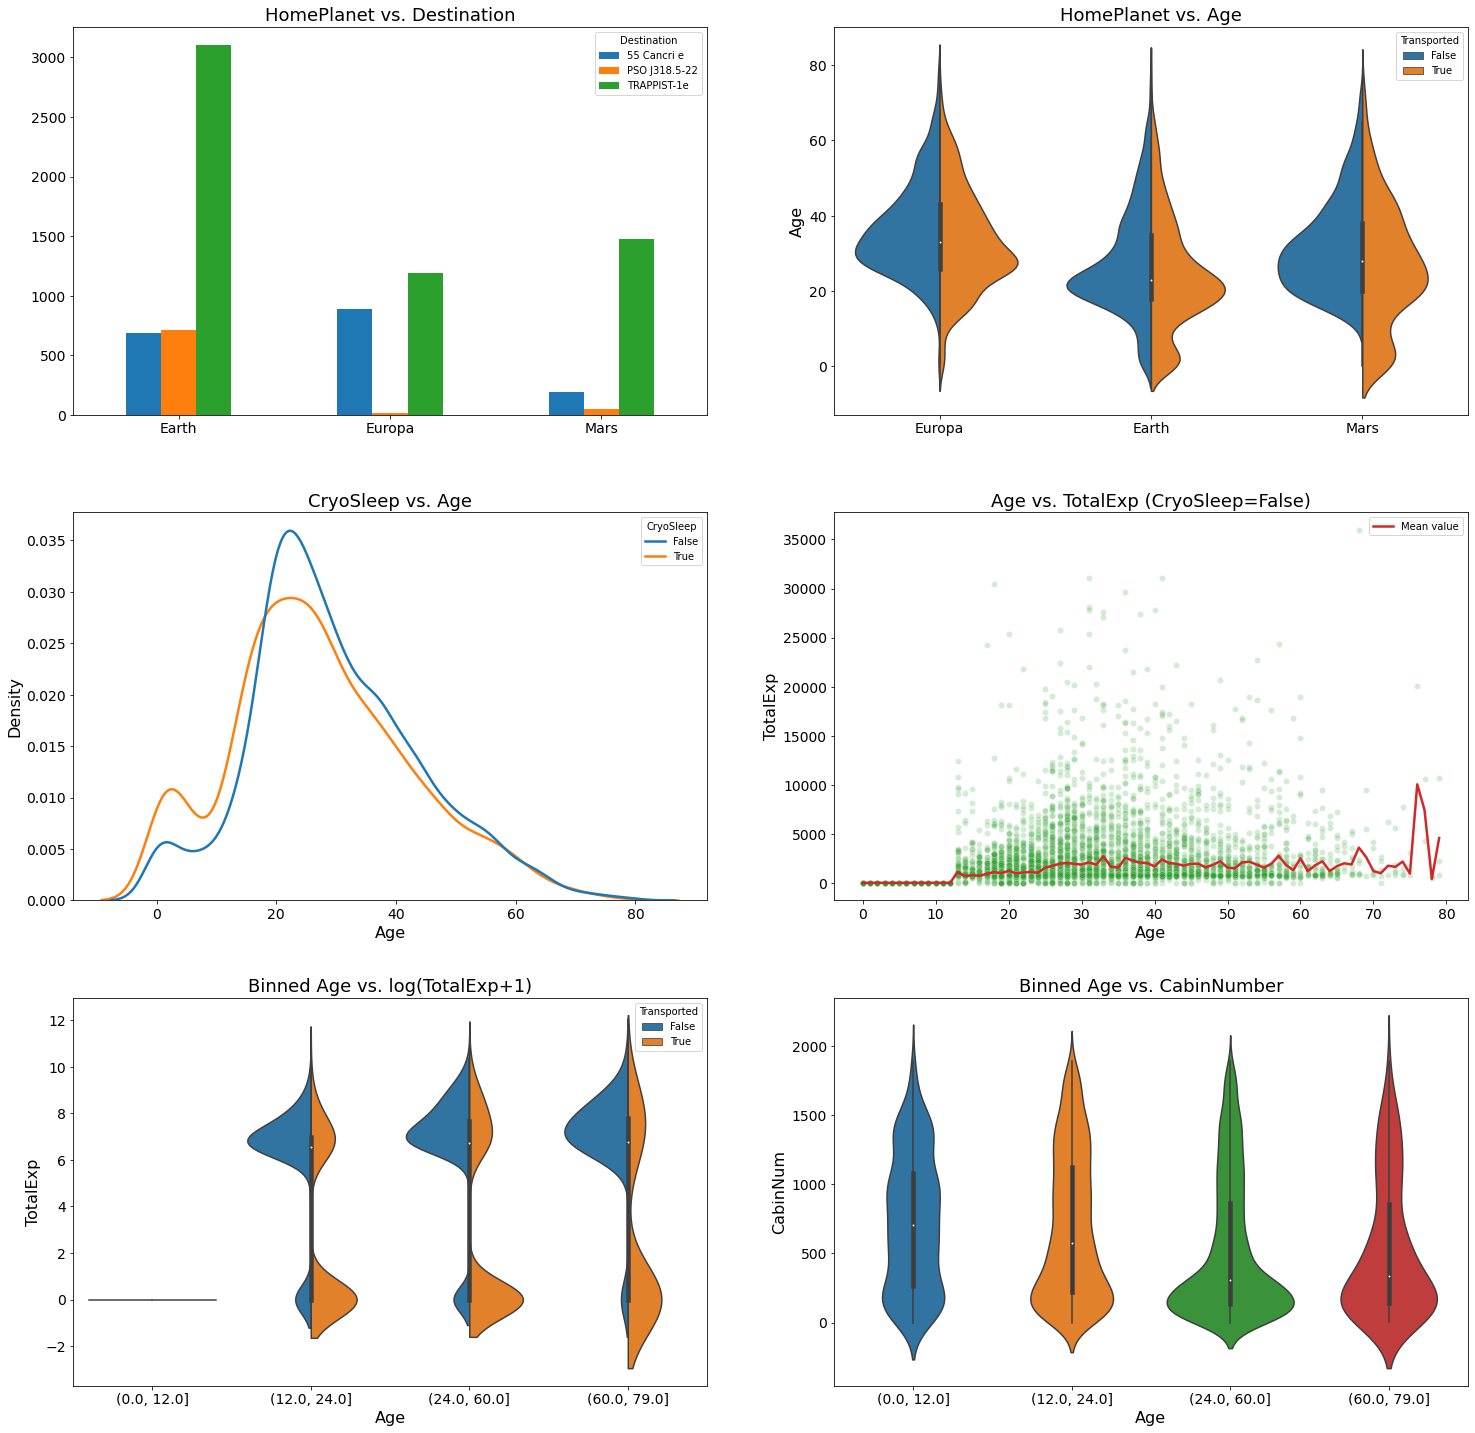

In [69]:
plt.figure(figsize=(25,25))

plt.subplot(3,2,1)
train.groupby("HomePlanet")["Destination"].value_counts().unstack().plot(kind="bar", rot=0, ax=plt.gca())
plt.title("HomePlanet vs. Destination", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("")

plt.subplot(3,2,2)
sns.violinplot(data=train, x="HomePlanet", y="Age", hue="Transported", split=True)
plt.title("HomePlanet vs. Age", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Age", fontsize=16)
plt.xlabel("")

plt.subplot(3,2,3)
sns.kdeplot(data=train.dropna(subset="CryoSleep"), x="Age", hue="CryoSleep", common_norm=False, linewidth=2.5, )
plt.title("CryoSleep vs. Age", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density", fontsize=16)
plt.xlabel("Age", fontsize=16)


plt.subplot(3,2,4)
sns.scatterplot(data=train[~train.CryoSleep], x="Age", y="TotalExp", alpha=0.2, color="C2")
date = train.groupby("Age")["TotalExp"].mean()
sns.lineplot(x=date.index, y=date, label="Mean value", color="C3", linewidth=2.5)
plt.title("Age vs. TotalExp (CryoSleep=False)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("TotalExp", fontsize=16)
plt.xlabel("Age", fontsize=16)

plt.subplot(3,2,5)
bin_age = pd.cut(train.Age, bins=(0, 12, 24, 60, max(train.Age)))
sns.violinplot(x=bin_age, y=np.log(train.TotalExp+1), hue=train.Transported, split=True)
plt.title("Binned Age vs. log(TotalExp+1)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("TotalExp", fontsize=16)
plt.xlabel("Age", fontsize=16)

plt.subplot(3,2,6)
sns.violinplot(x=bin_age, y=train.CabinNum.dropna().astype(int))
plt.title("Binned Age vs. CabinNumber", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("CabinNum", fontsize=16)
plt.xlabel("Age", fontsize=16)

plt.subplots_adjust(hspace=0.25)

The second plot suggests, that passengers from Europe are overall older. They have a peak in probability mass around 35 whereas the age distribution for Earth has a peak at a slightly younger age and additionally shows a second, smaller peak at very young ages. So judging from this observations, we can conclude that a higher ratio of passengers from Earth or Mars are traveling as a family with small kids compared to Europe passengers. For imputation purposes we can also see that almost every passenger with destination PSO J318.5-22 comes from Earth.

Also, the plot supports our theory, that younger passengers were more likely to get transported.

The fourth plot reveals another interesting information: Every passenger younger than 13 who is not in CryoSleep did not spend anything on the cruise. We can also use this fact for later imputation. 

<a id="Section3"></a>

## 4. Preprocess Data and impute missing Values

In the following, we will set up the pipeline to preprocess the data and impute missing values, as investigated and shown in the previous EDA. 

First, we will write a preprocess function that does the following:
- converts CryoSleep and VIP columns to boolean
- add a new column for TotalExpenses
- if specified, log-transform all expenses
- add the features extracted from PassengerId and drops the old, redundant column
- add the features extracted from Cabin and drops the old, redundant column

Then, we will write a function that imputes the missing values in the dataset according to the previously described strategies. For a detailed description, look into the respective section in the EDA/summary or read the docstring/comments in the function.

Lastly, another function will be added, that is applied after preprocessing and imputation, that recalculates and updates the TotalExp, since now some new values were added. Also, additional possible features will be added, that specify whether a passenger is: **Traveling alone or not / Did spend any money or not.**

**Note:** Of course, it is good practice in real life examples for example of you impute the mean of a column for NaN-values, to use the same mean (the one from the training set), for training as well as the test set. Since both sets have sufficiently large amounts of samples, we use the respective statistic from the actual dataset for the sake of simplicity.

In [3]:
def preprosess_spaceship_titanic(df, log_transform_exp=False):
    """
    Function that preprocesses the dataframe of the Spaceship Titanic dataset according to the
    process described in the notebook. 
    
    Returns the preprocessed dataset that can be fed to the imputation function.


    Parameters:
    -----------
    
    df (pandas.DataFrame)   : Raw pandas dataframe of the Spaceship Titanic Challenge
                                        
    log_transform_exp (bool): Boolean controlling whether expenses are log-transformed


    Returns:
    --------
    preprocessed (pandas.DataFrame): Preprocessed pandas dataframe
    
    """
    
    # Copy dataframe
    preprocessed = df.copy()
    
    # Convert CryoSleep and VIP to bool
    preprocessed[["CryoSleep", "VIP"]] = preprocessed[["CryoSleep", "VIP"]].astype("bool")
    
    # Add TotalExp column
    preprocessed["TotalExp"] = preprocessed[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(1)
    
    # LogTransform expenses (add one to avoid -Inf) if specified
    if log_transform_exp:
        preprocessed[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalExp']] = np.log(preprocessed[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalExp']]+1)
    
    # Preprocess PassengerId 
    preprocessed = pd.concat([preprocessed, preprocess_PassengerId(preprocessed)], axis=1)
    
    # Preprocess Cabin 
    preprocessed = pd.concat([preprocessed, preprocess_Cabin(preprocessed)], axis=1)
    preprocessed = preprocessed.drop("Cabin", axis=1)
    
    return preprocessed

In [4]:
def impute_group_category(group_categories, mode):
    """
    Function that takes series of categorical feature from a group 
    and finds most probable value to impute. 
    
    The mode (str) is the value in the overall dataset occuring the most, 
    that is used in cases where there are no information from groups. 
    """
    # Check if group size > 1
    if len(group_categories)>1:
        
        # Get unique category without nan
        homes_count = group_categories.value_counts()
        
        if len(homes_count)==1: # Only one category in group
            return homes_count.index[0]
        
        elif len(homes_count)==0: # Only NaNs, impute mode 
            return mode
        
        else: # More than one category in group
            
            if (homes_count==max(homes_count)).sum()==1: # If clear decision (so max only occurs once) take it
                return homes_count.idxmax()
            else: # There are two categories with same max count - sample one of them to reduce bias 
                return np.random.choice(homes_count[homes_count==max(homes_count)].index) # Sample one of them
    
    else:
        return mode

In [5]:
def impute_expenses(data, strategy):
    """
    Function that takes dataframe and imputes all NaN-expenses 
    according to the strategy described in the previous EDA.
    
    Returns the dataframe with imputed expenses.
    
    Parameters:
    -----------
    
    data (pandas.DataFrame): Dataframe with NaN-expenses
    
    strategy (str)         : String specifying strategy to impute expenses.
                                        
                             Possible values are: 
                             - 'mean' for mean imputation
                             - 'median' for median imputation
                             - 'group_mean' for imputation based on groups
                             - 'group_median' for imputation based on groups

    
    Returns:
    --------
    
    expense_df (pandas.DataFrame): Imputed pandas dataframe
                                  
    """
    
    # Copy df
    df = data.copy()
    
    
    if strategy=='median':
            # Each index filled with value in deck median series
            df = df.fillna({"RoomService":df.groupby("Deck")["RoomService"].transform("median"), 
                                   "FoodCourt":df.groupby("Deck")["FoodCourt"].transform("median"), 
                                   "Spa":df.groupby("Deck")["Spa"].transform("median"),
                                   "VRDeck":df.groupby("Deck")["VRDeck"].transform("median"), 
                                   "ShoppingMall":df.groupby("Deck")["ShoppingMall"].transform("median")})
                
        
        
    elif strategy=='mean':
        # Each index filled with value in deck mean series
        df = df.fillna({"RoomService":df.groupby("Deck")["RoomService"].transform("mean"), 
                               "FoodCourt":df.groupby("Deck")["FoodCourt"].transform("mean"), 
                               "Spa":df.groupby("Deck")["Spa"].transform("mean"),
                               "VRDeck":df.groupby("Deck")["VRDeck"].transform("mean"), 
                               "ShoppingMall":df.groupby("Deck")["ShoppingMall"].transform("mean")})



    elif strategy=='group_mean':
        # Each index filled with mean value of the group if group bigger 1 (otherwise deck median)
        df[df.GroupSize>1] = df[df.GroupSize>1].fillna({"RoomService":df.groupby("GroupID")["RoomService"].transform("mean"), 
                                                   "FoodCourt":df.groupby("GroupID")["FoodCourt"].transform("mean"), 
                                                   "Spa":df.groupby("GroupID")["Spa"].transform("mean"),
                                                   "VRDeck":df.groupby("GroupID")["VRDeck"].transform("mean"), 
                                                   "ShoppingMall":df.groupby("GroupID")["ShoppingMall"].transform("mean")})

        df[df.GroupSize==1] = df[df.GroupSize==1].fillna({"RoomService":df.groupby("Deck")["RoomService"].transform("median"), 
                                                   "FoodCourt":df.groupby("Deck")["FoodCourt"].transform("median"), 
                                                   "Spa":df.groupby("Deck")["Spa"].transform("median"),
                                                   "VRDeck":df.groupby("Deck")["VRDeck"].transform("median"), 
                                                   "ShoppingMall":df.groupby("Deck")["ShoppingMall"].transform("median")})



    elif strategy=='group_median':
        # Each index filled with mean value of the group if group bigger 1 (otherwise deck median)
        df[df.GroupSize>1] = df[df.GroupSize>1].fillna({"RoomService":df.groupby("GroupID")["RoomService"].transform("median"), 
                                                   "FoodCourt":df.groupby("GroupID")["FoodCourt"].transform("median"), 
                                                   "Spa":df.groupby("GroupID")["Spa"].transform("median"),
                                                   "VRDeck":df.groupby("GroupID")["VRDeck"].transform("median"), 
                                                   "ShoppingMall":df.groupby("GroupID")["ShoppingMall"].transform("median")})

        df[df.GroupSize==1] = df[df.GroupSize==1].fillna({"RoomService":df.groupby("Deck")["RoomService"].transform("median"), 
                                                   "FoodCourt":df.groupby("Deck")["FoodCourt"].transform("median"), 
                                                   "Spa":df.groupby("Deck")["Spa"].transform("median"),
                                                   "VRDeck":df.groupby("Deck")["VRDeck"].transform("median"), 
                                                   "ShoppingMall":df.groupby("Deck")["ShoppingMall"].transform("median")})

    else:
        raise ValueError("Wrong parameter value given.")

    return df

In [6]:
def impute_spaceship_titanic(preprocessed_df, proba_imp=True, expense_strat='group_mean', age_strat='group_mean', drop_outliers=False):
    """
    Function that imputes values for the Spaceship Titanic dataset based on the previous EDA. 
    
    Returns the dataset with imputed values.


    Parameters:
    -----------
    
    preprocessed_df (pandas.DataFrame): Preprocessed dataframe according to previous 
                                        EDA
                                        
    proba_imp (bool)                  : Boolean controlling whether only safe 
                                        imputations should be done or whether 
                                        probabilistic imputations (based on the 
                                        relatonships found in EDA should be included 
                                        too
                                        
    expense_strat (str)               : String specifying strategy to impute 
                                        different expense categories. 
                                        
                                        Possible values are: 
                                        - 'mean' for mean imputation
                                        - 'median' for median imputation
                                        - 'group_mean' for imputation based on groups
                                        - 'group_median' for imputation based on groups
    
    age_strat (str)                   : String specifying strategy to impute age.
                                        
                                        Possible values are: 
                                        - 'mean' for mean imputation
                                        - 'median' for median imputation
                                        - 'group_mean' for imputation based on groups
                                        
    drop_outliers (bool)              : Boolean specifying whether to drop outliers                    

    
    Returns:
    --------
    
    impute (pandas.DataFrame): Imputed pandas dataframe
    
    """

    # Copy DF
    impute = preprocessed_df.copy()

    
    # Delete outliers/implausible datapoints in training case:
    if drop_outliers:
        
        # Delete passengers under 12 years that are travelling alone
        impute = impute[~((impute.Age<12) & (impute.GroupSize==1))]

        # Throw away deck T
        impute = impute[impute.Deck!="T"]


    
    # Start with imputations that were found during EDA and that are 'safe'.

    # CryoSleep=True -> All expenses are 0
    exp_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    mask1 = impute.CryoSleep & impute.loc[:,exp_cols].isna().any(1)
    impute.loc[mask1, exp_cols] = impute.loc[mask1, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

    # TotalExp > 0 -> CryoSleep=False
    impute[impute.TotalExp>0] = impute[impute.TotalExp>0].fillna({"CryoSleep":0}) 

    # CryoSleep=False but age <= 12 -> All expenses are 0
    mask2 = ~impute.CryoSleep & impute.loc[:,exp_cols].isna().any(1)
    impute.loc[mask1, exp_cols] = impute.loc[mask1, exp_cols].fillna(0)

    # Deck=G -> VIP=False and HomePlanet=Earth
    impute[impute.Deck=="G"] = impute[impute.Deck=="G"].fillna({"VIP":False, "HomePlanet":"Earth"}) 

    # Deck A, B or C -> HomePlanet=Europa
    impute[impute.Deck.isin(["A", "B", "C"])] = impute[impute.Deck.isin(["A", "B", "C"])].fillna({"HomePlanet":"Europa"}) 

    

    
    # If specified, the probabilistic imputations are also executed in the following code.
    
    if proba_imp:

        # Set missing VIPs to False (in total only 2.3% VIPs so very likely)
        impute = impute.fillna({"VIP":False})

        # CryoSleep=NaN but Age<=12 -> CryoSleep=False (from analysis above)
        impute[impute.CryoSleep.isna() & (impute.Age<=12)] = impute[impute.CryoSleep.isna() & (impute.Age<=12)].fillna({"CryoSleep":False})

        # CryoSleep=NaN but Age>12 -> CryoSleep=True
        impute[impute.CryoSleep.isna() & (impute.Age>12)] = impute[impute.CryoSleep.isna() & (impute.Age>12)].fillna({"CryoSleep":True})
        
        # Impute Destination with Destination from group, otherwise with most likely one: TRAPPIST-1e
        impute["Destination"] = impute["Destination"].fillna(impute.groupby("GroupID")["Destination"].transform(impute_group_category, mode="TRAPPIST-1e"))
        
        # Impute HomePlanet with HomePlanet from group, otherwise with most likely one: Earth
        impute["HomePlanet"] = impute["HomePlanet"].fillna(impute.groupby("GroupID")["HomePlanet"].transform(impute_group_category, mode="Earth"))
        
        # Impute Deck with Deck from group, otherwise with most likely one: F
        impute["Deck"] = impute["Deck"].fillna(impute.groupby("GroupID")["Deck"].transform(impute_group_category, mode="F"))
        
        # Impute Side with Side from group, otherwise with "Missing":
        impute["Side"] = impute["Side"].fillna(impute.groupby("GroupID")["Side"].transform(impute_group_category, mode="Missing"))
        
        # Impute CabinNum with CabinNum from group, otherwise with "Missing":
        impute["CabinNum"] = impute["CabinNum"].fillna(impute.groupby("GroupID")["CabinNum"].transform(impute_group_category, mode="Missing"))
        
        
        # All expenses = 0 besides NaN values -> other expenses also 0 with high likelihood (showed in last part of analysis)
        mask3 = ~impute.CryoSleep & ((impute.iloc[:,6:11].isna().sum(1) + (impute.iloc[:,6:11]==0).sum(1))==5) & (impute.iloc[:,6:11].isna().sum(1)>0)
        impute.loc[mask3, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = impute.loc[mask3, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

        
        # Expense imputation
        impute = impute_expenses(impute, strategy=expense_strat)
        
        
        
        # Age imputation
        if age_strat=='mean':
            impute = impute.fillna({"Age":impute.Age.mean().round()})
            
        elif age_strat=='group_mean':
            # Impute group mean if possible
            impute[impute.GroupSize>1] = impute[impute.GroupSize>1].fillna({"Age":impute.groupby("GroupID")["Age"].transform("mean").round()})
                                                                        
            # Ohterwise take mean age of all passengers travelling alone
            impute[impute.GroupSize==1] = impute[impute.GroupSize==1].fillna({"Age": impute[impute.GroupSize==1].Age.mean().round()})
        
        else:
            raise ValueError("Wrong parameter value given.")
                                                                            
                                                                        
        
        # Columns that will not be used anyways are just filled with string "Missing" (we can still keep those rows):
        # Name
        impute = impute.fillna({"Name":"Missing"})
    
    return impute

In [7]:
def post_imputation_process_spaceship_titanic(imputed_df, was_log_transf):
    """
    Function that is applied after imputation, that recalculates TotalExp 
    and adds boolean-columns for travelling alone and spending nothing. 
    
    Returns the final dataframe.


    Parameters:
    -----------
    
    imputed_df (pandas.DataFrame): Df after preprocessing and imputation
                                        
    was_log_transformed (bool)   : Boolean controlling whether expenses were 
                                   log-transformed (important for TotalExp 
                                   update)


    Returns:
    --------
    
    final (pandas.DataFrame): Final pandas dataframe
    
    """
    
    # Copy df
    final = imputed_df.copy()
    
    # Impute small amount of remaining NaNs
    final = final.fillna({"CryoSleep": False, "Age":final.Age.mean().round()})
    
    # Transform age to int
    final.Age = final.Age.astype(int)
    
    # Update TotalExp
    if was_log_transf: # If they were log-transformed, backtransform, recalculate total, transform
        final[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = np.exp(final[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])-1
        final["TotalExp"] = final[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(1)
        
        # Transform again
        all_exp_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalExp']
        final[all_exp_cols] = np.log(final[all_exp_cols]+1)
        
        # Add prefix to mark as log transformed
        final.columns = [f"Log{col}" if col in all_exp_cols else col for col in final.columns]
    
    else: # If expenses were not log-transformed
        final["TotalExp"] = final[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(1)
        
    # Add marker for 0 expenses
    if was_log_transf:
        final["NoExpenses"] = (final.LogTotalExp == 0)
    else:
        final["NoExpenses"] = (final.TotalExp == 0)
    
    # Add marker for traveling alone
    final["Alone"] = (final.GroupSize == 1)
    
    return final

In [8]:
def preprocess_impute_spaceship_titanic(df, **kwargs):
    
    """
    Function that put togehter the whole preprocessing pipeline.
    
    Returns the final dataframe.


    Parameters:
    -----------
    
    df (pandas.DataFrame): Raw spaceship titanic pandas dataframe
                                        
    kwargs               : All other keyword arguments for other
                           functions:
                           - log_transform_exp
                           - proba_imp
                           - expense_strat
                           - age_strat
    
    Further information regarding kwargs:
    
    proba_imp (bool)                  : Boolean controlling whether only safe 
                                        imputations should be done or whether 
                                        probabilistic imputations (based on the 
                                        relatonships found in EDA should be included 
                                        too
                                        
    expense_strat (str)               : String specifying strategy to impute 
                                        different expense categories. 
                                        
                                        Possible values are: 
                                        - 'mean' for mean imputation
                                        - 'median' for median imputation
                                        - 'group_mean' for imputation based on groups
                                        - 'group_median' for imputation based on 
                                           groups
    
    age_strat (str)                   : String specifying strategy to impute age.
                                        
                                        Possible values are: 
                                        - 'mean' for mean imputation
                                        - 'median' for median imputation
                                        - 'group_mean' for imputation based on groups
                                        

    Returns:
    --------
    
    final_df (pandas.DataFrame): Final pandas dataframe after preprocessing pipeline
    
    """
    
    # Set default values for kwargs
    kwargs.setdefault('log_transform_exp', False)
    kwargs.setdefault('proba_imp', True)
    kwargs.setdefault('expense_strat', 'group_mean')
    kwargs.setdefault('age_strat', 'group_mean')
    kwargs.setdefault('drop_outliers', False)
    
    # Preprocess df
    preprocessed_df = preprosess_spaceship_titanic(df, log_transform_exp=kwargs['log_transform_exp'])
    
    # Impute missing values
    imputed_df = impute_spaceship_titanic(preprocessed_df, 
                                         proba_imp=kwargs['proba_imp'], 
                                         expense_strat=kwargs['expense_strat'],
                                         age_strat=kwargs['age_strat'],
                                         drop_outliers=kwargs['drop_outliers'])
    
    # Finalize preprocessing
    final_df = post_imputation_process_spaceship_titanic(imputed_df, was_log_transf=kwargs['log_transform_exp'])
    
    return final_df

**Use functions to preprocess data**

Now we use the derived functions to preprocess and clean the two datasets:

In [16]:
train_raw = pd.read_csv("./spaceship-titanic/train.csv")
test_raw = pd.read_csv(("./spaceship-titanic/test.csv"))

# Set params for preprocesing/imputation
log_transform_exp=False
proba_imp=True
expense_strat="group_median"
age_strat="group_mean"
drop_outliers=False

# Preprocess train 
train = preprocess_impute_spaceship_titanic(train_raw, 
                                            log_transform_exp=log_transform_exp, 
                                            proba_imp=proba_imp, 
                                            expense_strat=expense_strat, 
                                            age_strat=age_strat,
                                            drop_outliers=drop_outliers)

# Preprocess test in same way
test = preprocess_impute_spaceship_titanic(test_raw, 
                                           log_transform_exp=log_transform_exp, 
                                           proba_imp=proba_imp, 
                                           expense_strat=expense_strat, 
                                           age_strat=age_strat,
                                           drop_outliers=drop_outliers)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   int64  
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Name          8693 non-null   object 
 12  Transported   8693 non-null   bool   
 13  TotalExp      8693 non-null   float64
 14  GroupID       8693 non-null   int64  
 15  GroupPos      8693 non-null   int64  
 16  GroupSize     8693 non-null   int64  
 17  Deck          8693 non-null   object 
 18  CabinNum      8693 non-null 

<a id="Section5"></a>

## 5. Train exemplary Baseline-Models

In the following code, we will use the imputed dataset and train two different exemplary ensemble models, to predict the target variable and create a submission. First, we will train a bagging model, a RandomForest with 1100 trees. Second, we will train a boosting model, a Histogram-based Gradient Boosting Classifier. 

**Note:** This procedure is by far not complete or exhaustive and should only be an example of how to use the developed dataset for training a well performing model. In the background, I tried out a lot of different models and preprocessings (in an incredibly messy notebook haha). But the two presented models showed really good results in my submissions (Neural Networks and AdaBoost also performed very good). The respective hyperparameters were defined by GridSearchCV with 5 folds.

### 5.1 Prepare for modeling

In [15]:
# Get the raw test-data (we need the PassengerId for the submission)
test_raw = pd.read_csv("./spaceship-titanic/test.csv")

In the following, I wrote an additional function which takes care of reading the data and preprocessing it, using the functions we developed earlier. Also, it adds some further parameters you can play around with.

In [24]:
def read_preprocess_titanic(cat_features,
                            drop_features,
                            one_hot=True,
                            drop_first_label=False,
                            log_transform_exp=False,
                            proba_imp=True,
                            expense_strat="group_median",
                            age_strat="group_mean",
                            drop_outliers=False):
    
    """
    Function that reads the datasets and preprocesses them according to the specified parameters.
    It takes all parameters from the functions above. Also, features to drop and categorical features
    to encode can be provided as lists. 
    
    If one_hot=False, the cat_features are label encoded rather than one hot encoded.
    
    
    Returns:
    --------
    
    X (pandas.DataFrame)   : Final training dataset
    
    y (pandas.Series)      : Training target
    
    test (pandas.DataFrame): Preprocessed test set for submission
    
    """

    train_raw = pd.read_csv("./spaceship-titanic/train.csv")
    test_raw = pd.read_csv(("./spaceship-titanic/test.csv"))


    # Preprocess train 
    train = preprocess_impute_spaceship_titanic(train_raw, 
                                                log_transform_exp=log_transform_exp, 
                                                proba_imp=proba_imp, 
                                                expense_strat=expense_strat, 
                                                age_strat=age_strat,
                                                drop_outliers=drop_outliers)

    # Preprocess test in same way
    test = preprocess_impute_spaceship_titanic(test_raw, 
                                               log_transform_exp=log_transform_exp, 
                                               proba_imp=proba_imp, 
                                               expense_strat=expense_strat, 
                                               age_strat=age_strat,
                                               drop_outliers=drop_outliers)
        
    
    # Convert cat-features to dummies 
    if one_hot:
        train = pd.concat([train, pd.get_dummies(train[cat_features], drop_first=drop_first_label)], axis=1)
        train = train.drop(cat_features, axis=1)
        
        test = pd.concat([test, pd.get_dummies(test[cat_features], drop_first=drop_first_label)], axis=1)
        test = test.drop(cat_features, axis=1)
    
    # Encode cat-features as labels
    else:
        for feat in cat_features:
            LE = LabelEncoder().fit(train[feat])
            train[feat] = LE.transform(train[feat])
            test[feat] = LE.transform(test[feat])
         
        
    # Drop features
    train = train.drop(drop_features, axis=1)

    # Same for test
    test = test.drop(drop_features, axis=1)


    y = train.Transported.copy()
    X = train.drop("Transported", axis=1).copy()
    
    return X, test, y

### 5.2 Random Forest

Now we will train the first model, a RandomForest with 1100 trees. Categorical features are One-Hot-Encoded and I dropped some additional sub-categories for better generalization. The final performance of the classifier is measured with the Out-Of-Bag-Error, which can be used as an approximation for the final generalization error.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


# Preprocess data
X, test, y = read_preprocess_titanic(cat_features=['HomePlanet', 'Destination', 'Deck', 'Side'],
                                     drop_features=['PassengerId', 'Name', 'GroupPos', 'CabinNum'],
                                     one_hot=True,
                                     log_transform_exp=False)

# Drop additional features
X = X.drop(['VIP', 'Alone', 'Deck_T', 'Side_Missing'], axis=1)
test = test.drop(['VIP', 'Alone', 'Deck_T', 'Side_Missing'], axis=1)


RF = RandomForestClassifier(
                      n_estimators=1100, 
                      random_state=123, 
                      criterion='entropy',
                      max_depth=9,
                      max_features='sqrt', 
                      oob_score=True)

RF.fit(X,y)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=1100,
                       oob_score=True, random_state=123)

In [41]:
RF_best.oob_score_

0.8062809156792822

In [43]:
# Create Submission
RF_pred = RF.predict(test)

RF_sub = test_raw[["PassengerId"]].copy()
RF_sub["Transported"] = RF_pred

RF_sub.to_csv("./submissions/RF_submission.csv", index=False)

### 5.3 Gradient Boosting

Now we train a HistGradientBoostingClassifier, which performed even little bit better compared to the RandomForest. 

Categorical features will be Label-Encoded and expenses log-transformed. To approximate the final generalization error, we use cross validation with 10 folds.

In [45]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score

X, test, y = read_preprocess_titanic(cat_features=['HomePlanet', 'Destination', 'Deck', 'Side', 'VIP', 'CryoSleep', 'NoExpenses', 'Alone', 'GroupSize'],
                                     drop_features=['PassengerId', 'Name', 'GroupPos', 'CabinNum', 'GroupID'],
                                     one_hot=False,
                                     log_transform_exp=True)

# Get a mask for categorical columns
cat_feats = X.select_dtypes('int64').columns.drop('Age')
mask = [True if col in cat_feats else False for col in X.columns]



GB = HistGradientBoostingClassifier(random_state=123, 
                                    max_iter=120, 
                                    learning_rate=0.075, 
                                    loss='log_loss', 
                                    max_depth=10, 
                                    max_leaf_nodes=16, 
                                    min_samples_leaf=6, 
                                    l2_regularization=0, 
                                    categorical_features=mask)

CV_score = cross_val_score(GB, X, y, cv=10, n_jobs=-1)

print(f"CV-Results:\n{CV_score}\n\nMean-Accuracy: {np.mean(CV_score)}")

CV-Results:
[0.80344828 0.78045977 0.79425287 0.80897583 0.80322209 0.81703107
 0.83199079 0.82393556 0.82278481 0.7986191 ]

Mean-Accuracy: 0.8084720183061519


In [47]:
# Create Submission
GB.fit(X,y)
GB_pred = GB.predict(test)

GB_sub = test_raw[["PassengerId"]].copy()
GB_sub["Transported"] = GB_pred

GB_sub.to_csv("./submissions/GB_submission.csv", index=False)

### Summary
Summarizing, over the course of the analysis, we gained an in depth understanding of the dataset in general, so about the characteristics of the passengers who were travelling with the spaceship titanic. 

Also, we inspected the dataset's features, their relationships and found strategies for the imputation of missing values. 

Lastly, we trained two exemplary baseline models, one RandomForest and one GradientBoostingClassifier, and were able to achieve an accuracy over 80% on the test data with their predictions!

**If you have any comments, questions or other remarks, feel free to leave a comment or contact me directly :-)**